# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
sat_17 = pd.read_csv('../data/sat_2017.csv')
act_17 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
sat_17.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_17.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [5]:
act_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [6]:
act_17.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [7]:
sat_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [8]:
sat_17.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: Both sat_17 and act_17 have similar data relating to state and participation rates. However,the subjects for the individual test are different. SATs have two tests - Evidence-based  Reading and Writing & Math while ACTs have four tests - English, Math, Reading & Science. The way the total scores are calculated are also different - SATs calculated the combined score of both tests while ACTs calculate the composite score(average score) of the four tests.

#### 4a. Does the data look complete? 

Answer: Yes the data looks complete as there are 50 states included in both sat_17 and act_17 data sets. act_17 data set has an additional row for national average.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: 
The minimum and maximum possible value for the SAT is 400 and 1600 respectively. Each subtest has a minimum and maximum possible value of 200 and 800 respectively.
For the SAT data, the Participation rate is presented as a string with special characters instead of an integer.
Also, the Maryland average Math score for SAT 2017 should be 524 instead of 52.

The minimum and maximum possible value for the ACT is 1 and 36 respectively. Each subtest has a minimum and maximum possible value of 1 and 36 respectively.
For the ACT data, the Composite score column is presented as a string instead of a float, and the Participation rate is presented with special characters as a string instead of an integer. There also appears to be an additional 'x' included in the Composite score column for Wyoming State. There is also an extra row for national data which should be excluded if comparing between states.
Also, the Maryland average Science score for ACT 2017 should be 23.2 instead of 2.3

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [9]:
#Removed special characters from Participation column and convert to integer
sat_17['Participation'] = sat_17['Participation'].str.replace('%','')
sat_17['Participation'] = sat_17['Participation'].astype(int)
sat_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null int64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


In [10]:
#Amended Maryland Math score for SAT 2017
sat_17['Math'] = sat_17['Math'].replace(52,524)

In [11]:
#Removed special characters from Participation column and convert to integer
act_17['Participation'] = act_17['Participation'].str.replace('%','')
act_17['Participation'] = act_17['Participation'].astype(int)

In [12]:
#Removed special character from Composite column and convert to float
act_17['Composite'] = act_17['Composite'].apply(lambda y: y.replace('x','')).astype(float)
act_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null int64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.0+ KB


In [13]:
#Remove National row and reset index to start from 0
act_17 = act_17.drop([0, 0])
act_17.index = act_17.index - 1

In [14]:
#Amended Maryland Science score for ACT 2017
act_17['Science'] = act_17['Science'].replace(2.3,23.2)

#### 5. What are your data types? 
Display the data types of each feature. 

In [15]:
#code
sat_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null int64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


In [16]:
act_17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 7 columns):
State            51 non-null object
Participation    51 non-null int64
English          51 non-null float64
Math             51 non-null float64
Reading          51 non-null float64
Science          51 non-null float64
Composite        51 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.2+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:
Amended Participation column for sat_17 from str to integer.
Amended Participation column for act_17 from str to integer and Composite column from str to float.
Refer to 4c above.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [17]:
#code
#Refer to 4c above for errors fixed

- Fix any individual values preventing other columns from being the appropriate type.

In [18]:
#code
#Refer to 4c above for errors fixed

- Finish your data modifications by making sure the columns are now typed appropriately.

In [19]:
#code
#Refer to 4c above for errors fixed

- Display the data types again to confirm they are correct.

In [20]:
#Code:
sat_17['Participation'].dtype

dtype('int64')

In [21]:
act_17['Participation'].dtype

dtype('int64')

In [22]:
act_17['Composite'].dtype

dtype('float64')

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [23]:
sat_17.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [24]:
#renamed SAT columns to unique names
sat_17_renamed = sat_17.rename(columns = {'State':'state','Participation':'participation_sat_17','Evidence-Based Reading and Writing':'reading_and_writing_sat_17','Math':'math_sat_17','Total':'total_sat_17'})
sat_17_renamed.head()

,state,participation_sat_17,reading_and_writing_sat_17,math_sat_17,total_sat_17
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


In [25]:
act_17.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [26]:
#renamed ACT columns to unique names
act_17_renamed = act_17.rename(columns = {'State':'state','Participation':'participation_act_17','English':'english_act_17','Math':'math_act_17','Reading':'reading_act_17','Science':'science_act_17','Composite':'composite_act_17'})
act_17_renamed.head()

,state,participation_act_17,english_act_17,math_act_17,reading_act_17,science_act_17,composite_act_17
0,Alabama,100,18.9,18.4,19.7,19.4,19.2
1,Alaska,65,18.7,19.8,20.4,19.9,19.8
2,Arizona,62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,100,18.9,19.0,19.7,19.5,19.4
4,California,31,22.5,22.7,23.1,22.2,22.8


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|2017/2018 ACT/SAT|The individual state out of the 50 states in the United States of America.| 
|**participation_sat**|*int*|2017/2018 SAT|The participation rate of the SAT, defined as the percentage of a state's high school seniors taking the SAT represented by the z-score mean of a truncated normal distribution.| 
|**reading_and_writing_sat**|*int*|2017/2018 SAT|The average SAT scores for the Evidence-Based Reading and Writing (EBRW) section, scaled between 200 and 800 points.|
|**math_sat**|*int*|2017/2018 SAT|The average SAT scores for the Math section, scaled between 200 and 800 points.|
|**total_sat**|*int*|2017/2018 SAT|The average total of SAT scores for both the Evidence-Based Reading and Writing (EBRW) section and Math section, scaled out of 1,600 points.|
|**participation_act**|*int*|2017/2018 ACT|The participation rate of the ACT, defined as the percentage of a state's high school seniors taking the ACT represented by the z-score mean of a truncated normal distribution.|
|**english_act**|*float*|2017/2018 ACT|The average ACT scores for the English section, scored on a scale of 1 - 36.|
|**math_act**|*float*|2017/2018 ACT|The average ACT scores for the Math section, scored on a scale of 1 - 36.|
|**reading_act**|*float*|2017/2018 ACT|The average ACT scores for the Reading section, scored on a scale of 1 - 36.|
|**science_act**|*float*|2017/2018 ACT|The average ACT scores for the Science section, scored on a scale of 1 - 36.|
|**composite_act**|*float*|2017/2018 ACT|The average ACT composite score, calculated as the average of the scores for the four sections.|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [27]:
#removed National row for act_17. Refer to 4c above.

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [28]:
#Code:
merged_scores_17 = pd.merge(sat_17_renamed, act_17_renamed, on='state')

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [29]:
#code
merged_scores_17.to_csv('combined_2017.csv', index=False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [30]:
#Read in ACT and SAT 2018 data
sat_18 = pd.read_csv('../data/sat_2018.csv')
act_18 = pd.read_csv('../data/act_2018_updated.csv')

In [31]:
#Check datatype for SAT 2018 columns
sat_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [32]:
#Removed special characters from Participation column and convert to integer
sat_18['Participation'] = sat_18['Participation'].str.replace('%','')
sat_18['Participation'] = sat_18['Participation'].astype(int)
sat_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null int64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


In [33]:
#renamed SAT columns to unique names
sat_18_renamed = sat_18.rename(columns = {'State':'state','Participation':'participation_sat_18','Evidence-Based Reading and Writing':'reading_and_writing_sat_18','Math':'math_sat_18','Total':'total_sat_18'})
sat_18_renamed.head()

,state,participation_sat_18,reading_and_writing_sat_18,math_sat_18,total_sat_18
0,Alabama,6,595,571,1166
1,Alaska,43,562,544,1106
2,Arizona,29,577,572,1149
3,Arkansas,5,592,576,1169
4,California,60,540,536,1076


In [34]:
#Check datatype for ACT 2018 columns
act_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
State                            51 non-null object
Percentage of Students Tested    51 non-null int64
Average Composite Score          51 non-null float64
Average English Score            51 non-null float64
Average Math Score               51 non-null float64
Average Reading Score            51 non-null float64
Average Science Score            51 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [35]:
#renamed ACT columns to unique names
act_18_renamed = act_18.rename(columns = {'State':'state','Percentage of Students Tested':'participation_act_18','Average Composite Score':'composite_act_18','Average English Score':'english_act_18','Average Math Score':'math_act_18','Average Reading Score':'reading_act_18','Average Science Score':'science_act_18'})
act_18_renamed.head()

,state,participation_act_18,composite_act_18,english_act_18,math_act_18,reading_act_18,science_act_18
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [36]:
#reorder composite_act_18 column to the last column
act_18_renamed = act_18_renamed[['state', 'participation_act_18', 'english_act_18', 'math_act_18', 'reading_act_18', 'science_act_18', 'composite_act_18']]
act_18_renamed.head()

,state,participation_act_18,english_act_18,math_act_18,reading_act_18,science_act_18,composite_act_18
0,Alabama,100,18.9,18.3,19.6,19.0,19.1
1,Alaska,33,19.8,20.6,21.6,20.7,20.8
2,Arizona,66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,100,19.1,18.9,19.7,19.4,19.4
4,California,27,22.5,22.5,23.0,22.1,22.7


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [37]:
#merge dataframes for SAT 2018 and ACT 2018
merged_scores_18 = pd.merge(sat_18_renamed, act_18_renamed, on='state')

In [38]:
#merge dataframes for SAT 2017, ACT 2017 and SAT 2018, ACT 2018
merged_scores = pd.merge(merged_scores_17, merged_scores_18, on='state')

In [39]:
#save merged dataframe
merged_scores.to_csv('final.csv', index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [40]:
#Code:
merged_scores.describe()

,participation_sat_17,reading_and_writing_sat_17,math_sat_17,total_sat_17,participation_act_17,english_act_17,math_act_17,reading_act_17,science_act_17,composite_act_17,participation_sat_18,reading_and_writing_sat_18,math_sat_18,total_sat_18,participation_act_18,english_act_18,math_act_18,reading_act_18,science_act_18,composite_act_18
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,45.745098,563.686275,556.235294,1120.019608,61.647059,20.988235,21.125490,22.015686,21.345098,21.486275
std,35.276632,45.666901,47.121395,92.494812,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,37.314256,47.502627,47.772623,94.155083,34.080976,2.446356,2.035765,2.167245,1.870114,2.106278
min,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,480.000000,480.000000,977.000000,7.000000,16.600000,17.800000,18.000000,17.900000,17.700000
25%,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.500000,534.500000,522.500000,1057.500000,28.500000,19.100000,19.400000,20.450000,19.850000,19.950000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,52.000000,552.000000,544.000000,1098.000000,66.000000,20.200000,20.700000,21.600000,21.100000,21.300000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,77.500000,610.500000,593.500000,1204.000000,100.000000,23.700000,23.150000,24.100000,23.050000,23.550000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,643.000000,655.000000,1298.000000,100.000000,26.000000,25.200000,26.100000,24.900000,25.600000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [41]:
#code
def mean(data):
    return float(sum(data) / len(data))

def variance(data):
    mu = mean(data)
    return mean([(x - mu) ** 2 for x in data])

def stddev(data):
    return np.sqrt(variance(data))

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [42]:
sd = {col.name:stddev(col) for col in [merged_scores[i] for i in merged_scores.columns if (merged_scores[i].dtype=='float64') or (merged_scores[i].dtype=='int64')]}
sd

{'participation_sat_17': 34.92907076664508,
 'reading_and_writing_sat_17': 45.21697020437866,
 'math_sat_17': 46.65713364485503,
 'total_sat_17': 91.58351056778743,
 'participation_act_17': 31.824175751231806,
 'english_act_17': 2.3304876369363363,
 'math_act_17': 1.9624620273436781,
 'reading_act_17': 2.0469029314842646,
 'science_act_17': 1.7222161451443676,
 'composite_act_17': 2.000786081581989,
 'participation_sat_18': 36.946619223539415,
 'reading_and_writing_sat_18': 47.03460978357609,
 'math_sat_18': 47.30194550378352,
 'total_sat_18': 93.22742384464433,
 'participation_act_18': 33.745194881997506,
 'english_act_18': 2.4222536143202795,
 'math_act_18': 2.015707255555717,
 'reading_act_18': 2.145891884510421,
 'science_act_18': 1.8516885484833543,
 'composite_act_18': 2.0855261815801147}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

No. Output from pandas .describe function assumes 1 degree of freedom by default, also known as sample standard deviation. numpy.std assumes 0 degree of freedom by default, also known as population standard deviation.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [43]:
sat_17_renamed.groupby('state').sum().sort_values(by=['participation_sat_17'], ascending=False).head()
#District of Columbia, Michigan, Connecticut and Delaware have the highest participation rates for the 2017 SAT.

,participation_sat_17,reading_and_writing_sat_17,math_sat_17,total_sat_17
state,,,,
District of Columbia,100,482,468,950
Michigan,100,509,495,1005
Connecticut,100,530,512,1041
Delaware,100,503,492,996
New Hampshire,96,532,520,1052


In [44]:
sat_17_renamed.groupby('state').sum().sort_values(by=['participation_sat_17']).head(4)
#North Dakota, Mississippi and Iowa have the lowest participation rates for the 2017 SAT.

,participation_sat_17,reading_and_writing_sat_17,math_sat_17,total_sat_17
state,,,,
North Dakota,2,635,621,1256
Mississippi,2,634,607,1242
Iowa,2,641,635,1275
Missouri,3,640,631,1271


In [45]:
sat_18_renamed.groupby('state').sum().sort_values(by=['participation_sat_18'], ascending=False).head(6)
#Colorado, Connecticut, Delaware, Michigan and Idaho have the highest participation rates for the 2018 SAT.

,participation_sat_18,reading_and_writing_sat_18,math_sat_18,total_sat_18
state,,,,
Colorado,100,519,506,1025
Connecticut,100,535,519,1053
Delaware,100,505,492,998
Michigan,100,511,499,1011
Idaho,100,508,493,1001
Maine,99,512,501,1013


In [46]:
sat_18_renamed.groupby('state').sum().sort_values(by=['participation_sat_18']).head(2)
#North Dakota has the lowest participation rates for the 2018 SAT.

,participation_sat_18,reading_and_writing_sat_18,math_sat_18,total_sat_18
state,,,,
North Dakota,2,640,643,1283
Wyoming,3,633,625,1257


In [47]:
act_17_renamed.groupby('state').sum().sort_values(by=['participation_act_17'], ascending=False).head(18)
#Alabama, Kentucy, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, North Carolina, Nevada, Montana, 
#Mississippi, Minnesota, Louisiana, Missouri, Wyoming, Colorado, Arkansas 
#have the highest participation rates for the 2017 ACT.

,participation_act_17,english_act_17,math_act_17,reading_act_17,science_act_17,composite_act_17
state,,,,,,
Alabama,100,18.9,18.4,19.7,19.4,19.2
Kentucky,100,19.6,19.4,20.5,20.1,20.0
Wisconsin,100,19.7,20.4,20.6,20.9,20.5
Utah,100,19.5,19.9,20.8,20.6,20.3
Tennessee,100,19.5,19.2,20.1,19.9,19.8
South Carolina,100,17.5,18.6,19.1,18.9,18.7
Oklahoma,100,18.5,18.8,20.1,19.6,19.4
North Carolina,100,17.8,19.3,19.6,19.3,19.1
Nevada,100,16.3,18.0,18.1,18.2,17.8


In [48]:
act_17_renamed.groupby('state').sum().sort_values(by=['participation_act_17']).head(2)
#Maine has the lowest participation rates for the 2017 ACT.

,participation_act_17,english_act_17,math_act_17,reading_act_17,science_act_17,composite_act_17
state,,,,,,
Maine,8,24.2,24.0,24.8,23.7,24.3
New Hampshire,18,25.4,25.1,26.0,24.9,25.5


In [49]:
act_18_renamed.groupby('state').sum().sort_values(by=['participation_act_18'], ascending=False).head(18)
#Alabama, Kentucy, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, Ohio, North Carolina,
#Nevada, Nebraska, Montana, Mississippi, Louisiana, Missouri, Wyoming and Arkansas 
#have the highest participation rates for the 2018 ACT.

,participation_act_18,english_act_18,math_act_18,reading_act_18,science_act_18,composite_act_18
state,,,,,,
Alabama,100,18.9,18.3,19.6,19.0,19.1
Kentucky,100,19.9,19.7,20.8,20.1,20.2
Wisconsin,100,19.8,20.3,20.6,20.8,20.5
Utah,100,19.7,19.9,20.9,20.5,20.4
Tennessee,100,19.4,19.1,19.9,19.6,19.6
South Carolina,100,17.3,18.2,18.6,18.5,18.3
Oklahoma,100,18.4,18.8,20.1,19.4,19.3
Ohio,100,19.3,20.3,20.8,20.4,20.3
North Carolina,100,18.0,19.3,19.5,19.2,19.1


In [50]:
act_18_renamed.groupby('state').sum().sort_values(by=['participation_act_18']).head(2)
#Maine has the lowest participation rates for the 2018 ACT.

,participation_act_18,english_act_18,math_act_18,reading_act_18,science_act_18,composite_act_18
state,,,,,,
Maine,7,23.8,23.6,24.7,23.4,24.0
Rhode Island,15,24.4,23.6,25.0,23.5,24.2


In [51]:
sat_17_renamed.groupby('state').sum().sort_values(by=['total_sat_17'], ascending=False).head(2)
#Minnesota has the highest mean total score for the 2017 SAT.

,participation_sat_17,reading_and_writing_sat_17,math_sat_17,total_sat_17
state,,,,
Minnesota,3,644,651,1295
Wisconsin,3,642,649,1291


In [52]:
sat_17_renamed.groupby('state').sum().sort_values(by=['total_sat_17']).head(2)
#District of Columbia has the lowest mean total score for the 2017 SAT.

,participation_sat_17,reading_and_writing_sat_17,math_sat_17,total_sat_17
state,,,,
District of Columbia,100,482,468,950
Delaware,100,503,492,996


In [53]:
sat_18_renamed.groupby('state').sum().sort_values(by=['total_sat_18'], ascending=False).head(2)
#Minnesota has the highest mean total score for the 2018 SAT.

,participation_sat_18,reading_and_writing_sat_18,math_sat_18,total_sat_18
state,,,,
Minnesota,4,643,655,1298
Wisconsin,3,641,653,1294


In [54]:
sat_18_renamed.groupby('state').sum().sort_values(by=['total_sat_18']).head(2)
#District of Columbia has the lowest mean total score for the 2018 SAT.

,participation_sat_18,reading_and_writing_sat_18,math_sat_18,total_sat_18
state,,,,
District of Columbia,92,497,480,977
Delaware,100,505,492,998


In [55]:
act_17_renamed.groupby('state').sum().sort_values(by=['composite_act_17'], ascending=False).head(2)
#New Hampshire has the highest mean composite score for the 2017 ACT.

,participation_act_17,english_act_17,math_act_17,reading_act_17,science_act_17,composite_act_17
state,,,,,,
New Hampshire,18,25.4,25.1,26.0,24.9,25.5
Massachusetts,29,25.4,25.3,25.9,24.7,25.4


In [56]:
act_17_renamed.groupby('state').sum().sort_values(by=['composite_act_17']).head(2)
#Nevada has the lowest mean composite score for the 2017 ACT.

,participation_act_17,english_act_17,math_act_17,reading_act_17,science_act_17,composite_act_17
state,,,,,,
Nevada,100,16.3,18.0,18.1,18.2,17.8
Mississippi,100,18.2,18.1,18.8,18.8,18.6


In [57]:
act_18_renamed.groupby('state').sum().sort_values(by=['composite_act_18'], ascending=False).head(2)
#Connecticut has the highest mean composite score for the 2018 ACT.

,participation_act_18,english_act_18,math_act_18,reading_act_18,science_act_18,composite_act_18
state,,,,,,
Connecticut,26,26.0,24.8,26.1,24.9,25.6
Massachusetts,25,25.5,25.2,25.9,24.7,25.5


In [58]:
act_18_renamed.groupby('state').sum().sort_values(by=['composite_act_18']).head(2)
#Nevada has the lowest mean composite score for the 2018 ACT.

,participation_act_18,english_act_18,math_act_18,reading_act_18,science_act_18,composite_act_18
state,,,,,,
Nevada,100,16.6,17.8,18.0,17.9,17.7
South Carolina,100,17.3,18.2,18.6,18.5,18.3


In [59]:
merged_scores.groupby(['state','participation_sat_17','participation_sat_18']).sum().sort_values(by=['participation_sat_17'], ascending=False).head()
#District of Columbia with 100% participation on SAT in 2017 had a rate change year-to-year to 92% in 2018.

,,,reading_and_writing_sat_17,math_sat_17,total_sat_17,participation_act_17,english_act_17,math_act_17,reading_act_17,science_act_17,composite_act_17,reading_and_writing_sat_18,math_sat_18,total_sat_18,participation_act_18,english_act_18,math_act_18,reading_act_18,science_act_18,composite_act_18
state,participation_sat_17,participation_sat_18,,,,,,,,,,,,,,,,,,
District of Columbia,100,92,482,468,950,32,24.4,23.5,24.9,23.5,24.2,497,480,977,32,23.7,22.7,24.4,23.0,23.6
Michigan,100,100,509,495,1005,29,24.1,23.7,24.5,23.8,24.1,511,499,1011,22,24.5,23.9,24.7,23.9,24.4
Connecticut,100,100,530,512,1041,31,25.5,24.6,25.6,24.6,25.2,535,519,1053,26,26.0,24.8,26.1,24.9,25.6
Delaware,100,100,503,492,996,18,24.1,23.4,24.8,23.6,24.1,505,492,998,17,23.7,23.1,24.5,23.4,23.2
New Hampshire,96,96,532,520,1052,18,25.4,25.1,26.0,24.9,25.5,535,528,1063,16,25.1,24.7,25.6,24.4,25.1


In [60]:
merged_scores.groupby(['state','participation_act_17','participation_act_18']).sum().sort_values(by=['participation_act_17'], ascending=False).head(18)
#Minnesota with 100% participation on ACT in 2017 had a rate change year-to-year to 99% in 2018.

,,,participation_sat_17,reading_and_writing_sat_17,math_sat_17,total_sat_17,english_act_17,math_act_17,reading_act_17,science_act_17,composite_act_17,participation_sat_18,reading_and_writing_sat_18,math_sat_18,total_sat_18,english_act_18,math_act_18,reading_act_18,science_act_18,composite_act_18
state,participation_act_17,participation_act_18,,,,,,,,,,,,,,,,,,
Alabama,100,100,5,593,572,1165,18.9,18.4,19.7,19.4,19.2,6,595,571,1166,18.9,18.3,19.6,19.0,19.1
Kentucky,100,100,4,631,616,1247,19.6,19.4,20.5,20.1,20.0,4,630,618,1248,19.9,19.7,20.8,20.1,20.2
Wisconsin,100,100,3,642,649,1291,19.7,20.4,20.6,20.9,20.5,3,641,653,1294,19.8,20.3,20.6,20.8,20.5
Utah,100,100,3,624,614,1238,19.5,19.9,20.8,20.6,20.3,4,480,530,1010,19.7,19.9,20.9,20.5,20.4
Tennessee,100,100,5,623,604,1228,19.5,19.2,20.1,19.9,19.8,6,624,607,1231,19.4,19.1,19.9,19.6,19.6
South Carolina,100,100,50,543,521,1064,17.5,18.6,19.1,18.9,18.7,55,547,523,1070,17.3,18.2,18.6,18.5,18.3
Oklahoma,100,100,7,530,517,1047,18.5,18.8,20.1,19.6,19.4,8,541,521,1062,18.4,18.8,20.1,19.4,19.3
North Carolina,100,100,49,546,535,1081,17.8,19.3,19.6,19.3,19.1,52,554,543,1098,18.0,19.3,19.5,19.2,19.1
Nevada,100,100,26,563,553,1116,16.3,18.0,18.1,18.2,17.8,23,574,566,1140,16.6,17.8,18.0,17.9,17.7


In [61]:
merged_scores.groupby(['state','participation_sat_17','participation_act_17']).sum().sort_values(by=['participation_sat_17'], ascending=False).head(24)
#Florida, Georgia, Hawaii and South Carolina have >50% participation on both tests in 2017.

,,,reading_and_writing_sat_17,math_sat_17,total_sat_17,english_act_17,math_act_17,reading_act_17,science_act_17,composite_act_17,participation_sat_18,reading_and_writing_sat_18,math_sat_18,total_sat_18,participation_act_18,english_act_18,math_act_18,reading_act_18,science_act_18,composite_act_18
state,participation_sat_17,participation_act_17,,,,,,,,,,,,,,,,,,
District of Columbia,100,32,482,468,950,24.4,23.5,24.9,23.5,24.2,92,497,480,977,32,23.7,22.7,24.4,23.0,23.6
Michigan,100,29,509,495,1005,24.1,23.7,24.5,23.8,24.1,100,511,499,1011,22,24.5,23.9,24.7,23.9,24.4
Connecticut,100,31,530,512,1041,25.5,24.6,25.6,24.6,25.2,100,535,519,1053,26,26.0,24.8,26.1,24.9,25.6
Delaware,100,18,503,492,996,24.1,23.4,24.8,23.6,24.1,100,505,492,998,17,23.7,23.1,24.5,23.4,23.2
New Hampshire,96,18,532,520,1052,25.4,25.1,26.0,24.9,25.5,96,535,528,1063,16,25.1,24.7,25.6,24.4,25.1
Maine,95,8,513,499,1012,24.2,24.0,24.8,23.7,24.3,99,512,501,1013,7,23.8,23.6,24.7,23.4,24.0
Idaho,93,38,513,493,1005,21.9,21.8,23.0,22.1,22.3,100,508,493,1001,36,21.9,21.6,23.2,22.1,22.3
Florida,83,73,520,497,1017,19.0,19.4,21.0,19.4,19.8,56,550,549,1099,66,19.2,19.3,21.1,19.5,19.9
Massachusetts,76,29,555,551,1107,25.4,25.3,25.9,24.7,25.4,80,562,563,1125,25,25.5,25.2,25.9,24.7,25.5


In [62]:
merged_scores.groupby(['state','participation_sat_18','participation_act_18']).sum().sort_values(by=['participation_sat_18'], ascending=False).head(27)
#Florida, Georgia, Hawaii, North Carolina and South Carolina have >50% participation on both tests in 2018.

,,,participation_sat_17,reading_and_writing_sat_17,math_sat_17,total_sat_17,participation_act_17,english_act_17,math_act_17,reading_act_17,science_act_17,composite_act_17,reading_and_writing_sat_18,math_sat_18,total_sat_18,english_act_18,math_act_18,reading_act_18,science_act_18,composite_act_18
state,participation_sat_18,participation_act_18,,,,,,,,,,,,,,,,,,
Colorado,100,30,11,606,595,1201,100,20.1,20.3,21.2,20.9,20.8,519,506,1025,23.9,23.2,24.4,23.5,23.9
Connecticut,100,26,100,530,512,1041,31,25.5,24.6,25.6,24.6,25.2,535,519,1053,26.0,24.8,26.1,24.9,25.6
Delaware,100,17,100,503,492,996,18,24.1,23.4,24.8,23.6,24.1,505,492,998,23.7,23.1,24.5,23.4,23.2
Michigan,100,22,100,509,495,1005,29,24.1,23.7,24.5,23.8,24.1,511,499,1011,24.5,23.9,24.7,23.9,24.4
Idaho,100,36,93,513,493,1005,38,21.9,21.8,23.0,22.1,22.3,508,493,1001,21.9,21.6,23.2,22.1,22.3
Maine,99,7,95,513,499,1012,8,24.2,24.0,24.8,23.7,24.3,512,501,1013,23.8,23.6,24.7,23.4,24.0
Illinois,99,43,9,559,556,1115,93,21.0,21.2,21.6,21.3,21.4,513,506,1019,24.1,23.4,24.2,23.4,23.9
Rhode Island,97,15,71,539,524,1062,21,24.0,23.3,24.7,23.4,24.0,513,505,1018,24.4,23.6,25.0,23.5,24.2
New Hampshire,96,16,96,532,520,1052,18,25.4,25.1,26.0,24.9,25.5,535,528,1063,25.1,24.7,25.6,24.4,25.1


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

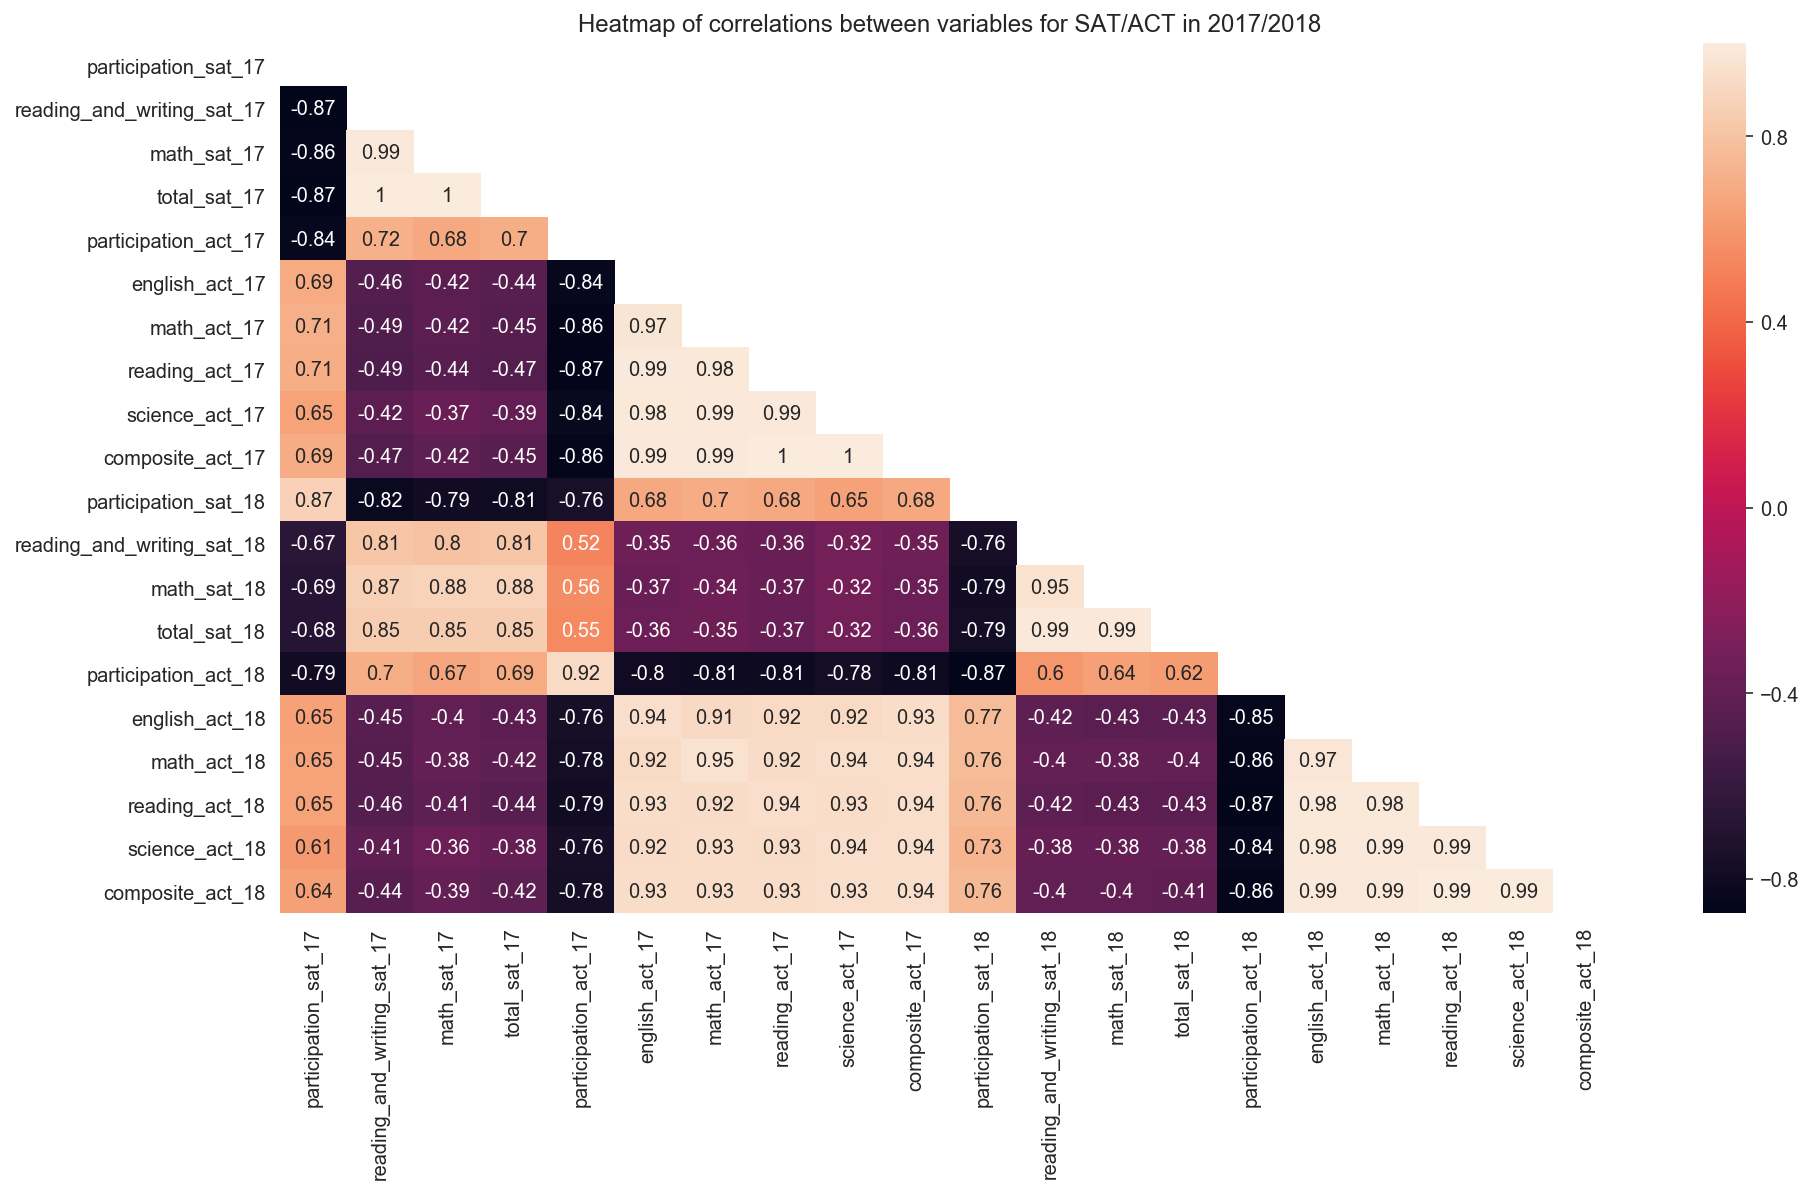

In [63]:
# Make a heatmap on the correlations between variables in the housing data:
fig, ax = plt.subplots(figsize=(15,8))
merged_scores_correlations = merged_scores.corr();
# Compute the correlation matrix
corr = merged_scores.corr()
# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(merged_scores_correlations, mask=mask, annot=True);
plt.title('Heatmap of correlations between variables for SAT/ACT in 2017/2018');

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [64]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(16, 9)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].title.set_text(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

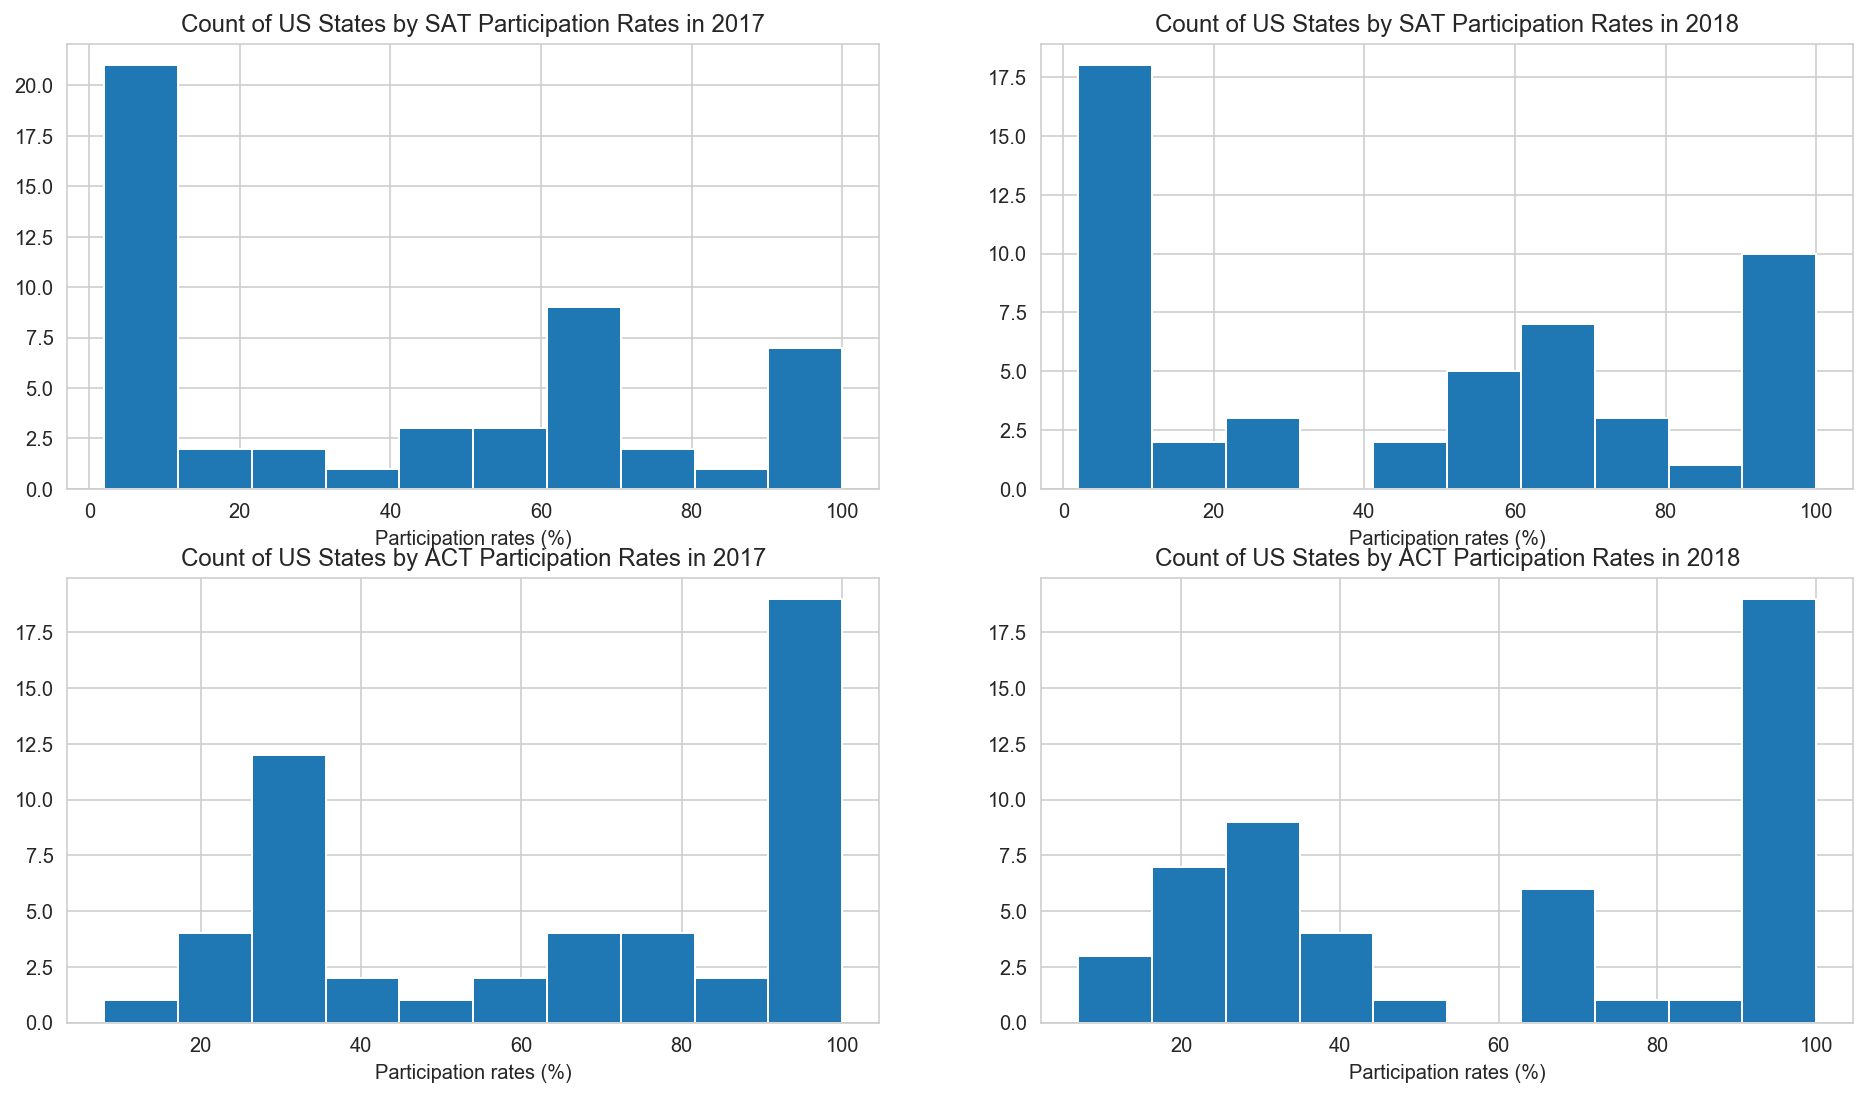

In [65]:
#Participation rates for SAT & ACT
subplot_histograms(merged_scores,['participation_sat_17','participation_sat_18','participation_act_17','participation_act_18'],\
['Count of US States by SAT Participation Rates in 2017','Count of US States by SAT Participation Rates in 2018','Count of US States by ACT Participation Rates in 2017','Count of US States by ACT Participation Rates in 2018'],['Participation rates (%)','Participation rates (%)','Participation rates (%)','Participation rates (%)'])

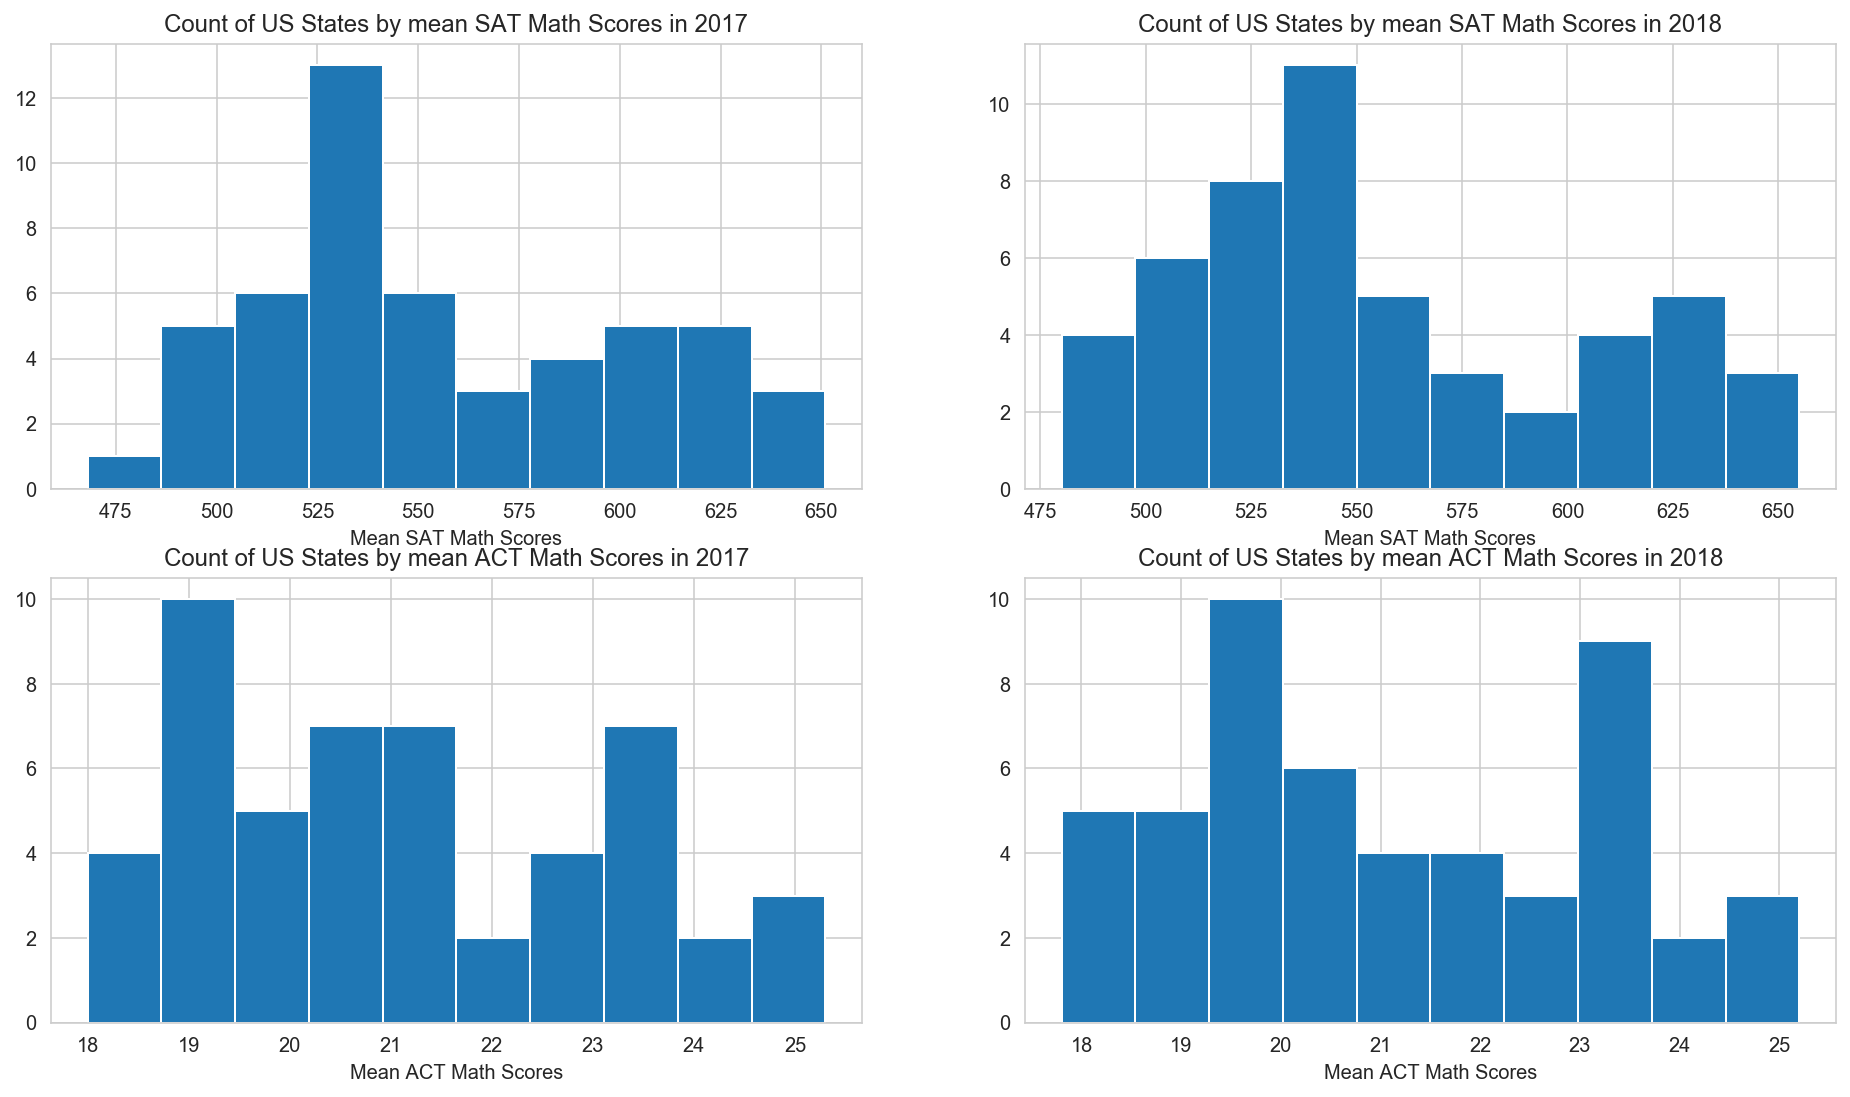

In [66]:
#Math scores for SAT & ACT
subplot_histograms(merged_scores,['math_sat_17','math_sat_18','math_act_17','math_act_18'],['Count of US States by mean SAT Math Scores in 2017','Count of US States by mean SAT Math Scores in 2018','Count of US States by mean ACT Math Scores in 2017','Count of US States by mean ACT Math Scores in 2018'],['Mean SAT Math Scores','Mean SAT Math Scores','Mean ACT Math Scores','Mean ACT Math Scores'])

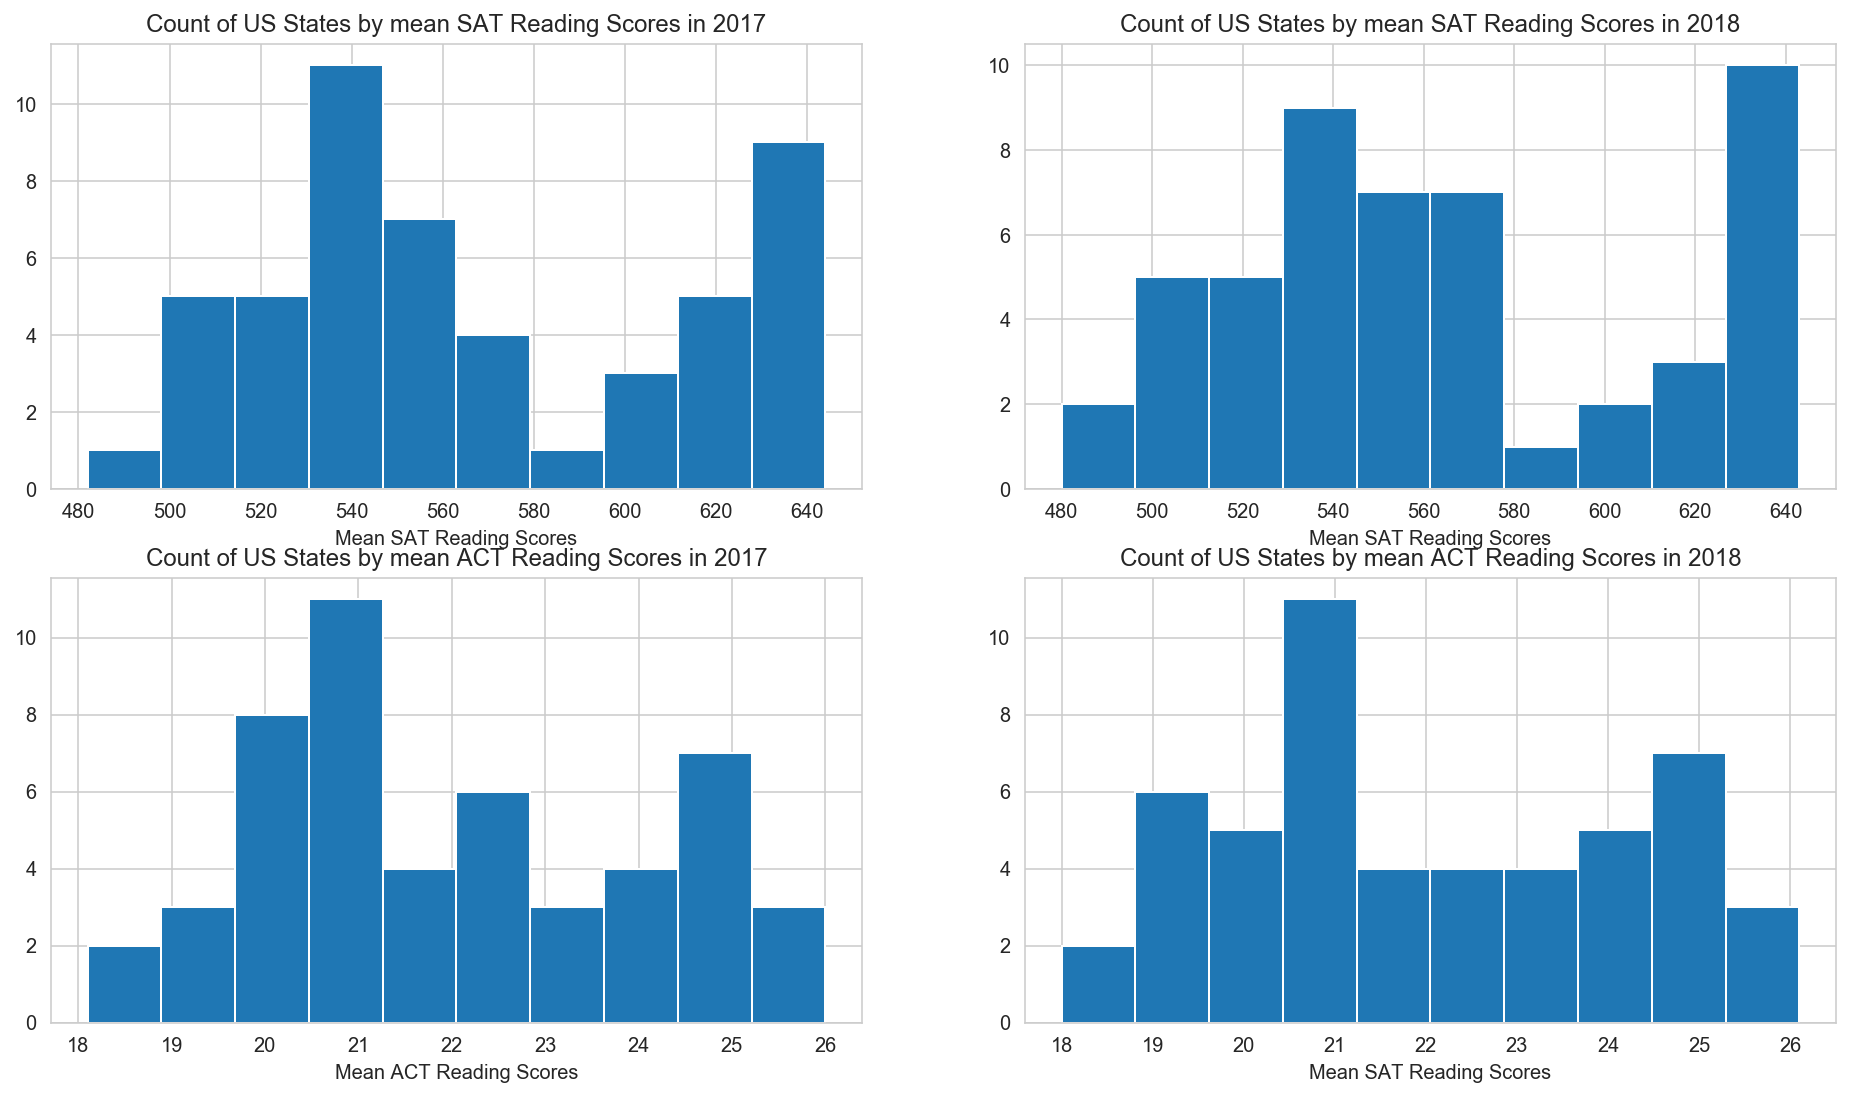

In [67]:
#Reading/verbal scores for SAT & ACT
subplot_histograms(merged_scores,['reading_and_writing_sat_17','reading_and_writing_sat_18','reading_act_17','reading_act_18'],['Count of US States by mean SAT Reading Scores in 2017','Count of US States by mean SAT Reading Scores in 2018','Count of US States by mean ACT Reading Scores in 2017','Count of US States by mean ACT Reading Scores in 2018'],['Mean SAT Reading Scores','Mean SAT Reading Scores','Mean ACT Reading Scores','Mean SAT Reading Scores'])

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


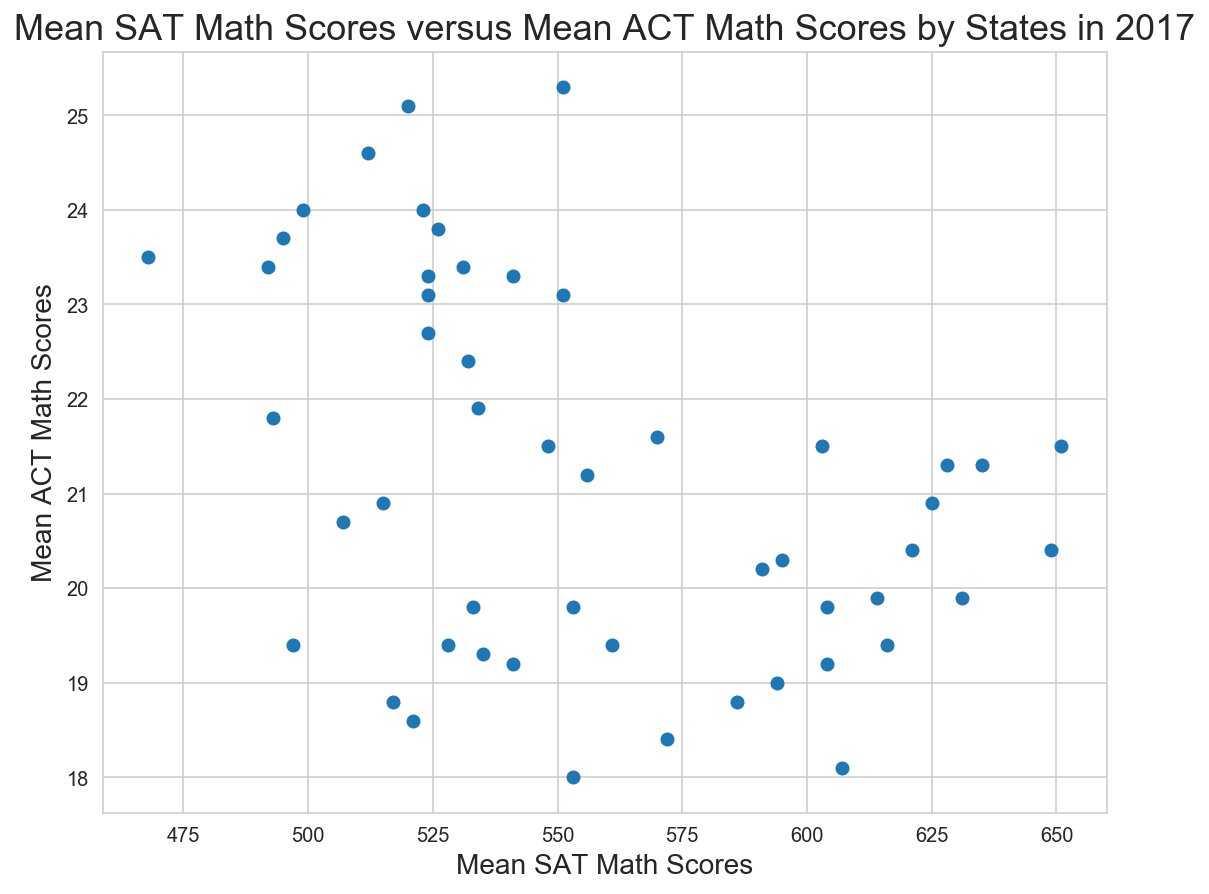

In [68]:
# SAT vs. ACT math scores for 2017
# Establish the size of the figure.
plt.figure(figsize=(9, 7))

# Create scatter plot of SAT vs. ACT math scores for 2017.
plt.scatter(merged_scores.math_sat_17,
            merged_scores.math_act_17);

plt.title("Mean SAT Math Scores versus Mean ACT Math Scores by States in 2017", fontsize = 18)
plt.ylabel("Mean ACT Math Scores", fontsize = 14)
plt.xlabel("Mean SAT Math Scores", fontsize = 14);

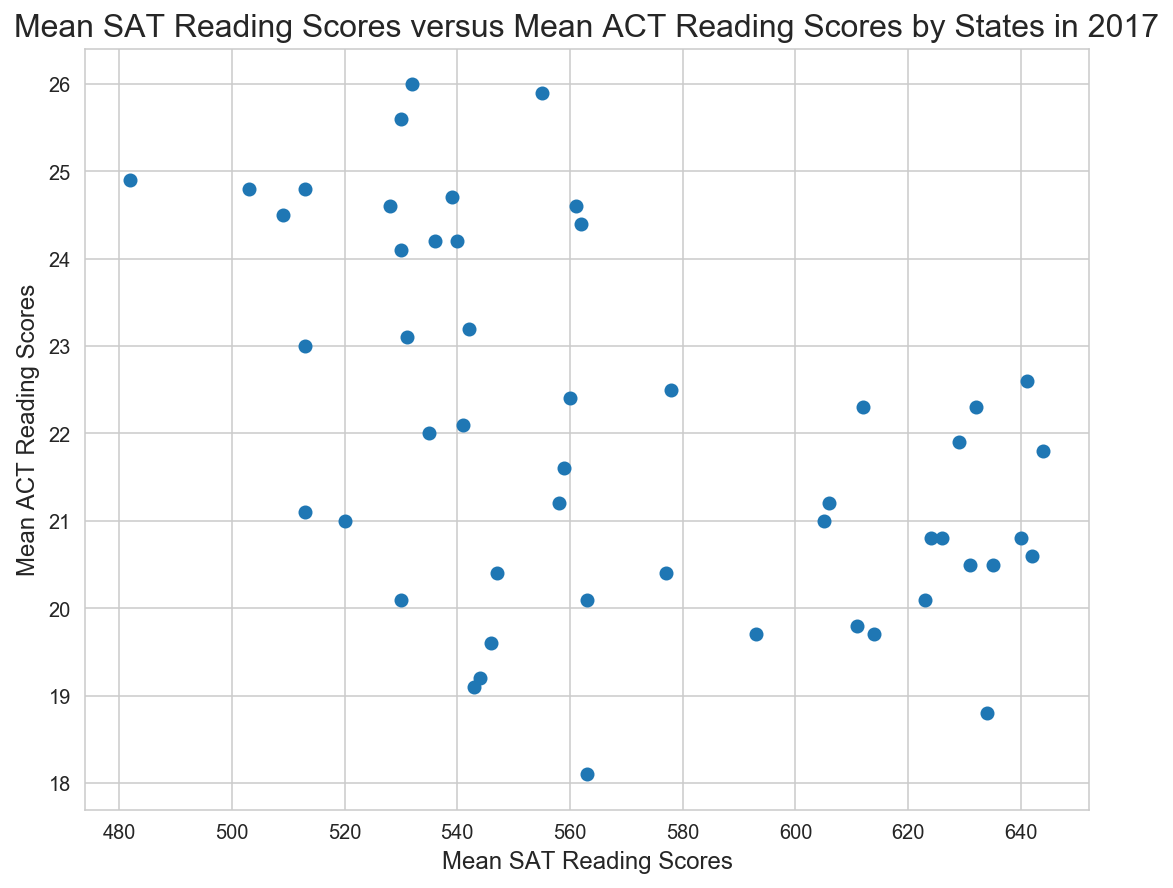

In [69]:
# SAT vs. ACT verbal/reading scores for 2017
# Establish the size of the figure.
plt.figure(figsize=(9, 7))

# Create scatter plot of SAT vs. ACT verbal/reading scores for 2017.
plt.scatter(merged_scores.reading_and_writing_sat_17,
            merged_scores.reading_act_17);

plt.title("Mean SAT Reading Scores versus Mean ACT Reading Scores by States in 2017", fontsize = 16)
plt.ylabel("Mean ACT Reading Scores", fontsize = 12)
plt.xlabel("Mean SAT Reading Scores", fontsize = 12);

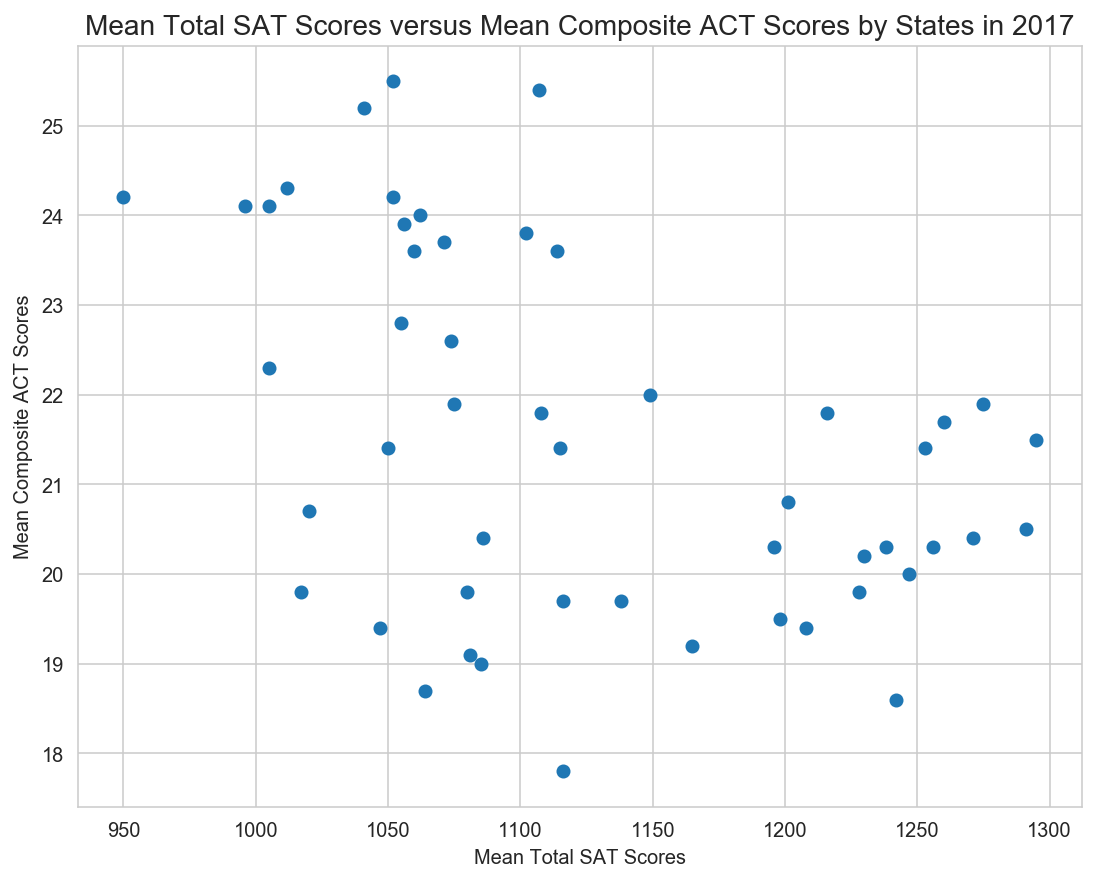

In [70]:
# SAT vs. ACT total/composite scores for 2017
# Establish the size of the figure.
plt.figure(figsize=(9, 7))

# Create scatter plot of SAT vs. ACT total/composite scores for 2017.
plt.scatter(merged_scores.total_sat_17,
            merged_scores.composite_act_17);

plt.title("Mean Total SAT Scores versus Mean Composite ACT Scores by States in 2017", fontsize = 14)
plt.ylabel("Mean Composite ACT Scores", fontsize = 10)
plt.xlabel("Mean Total SAT Scores", fontsize = 10);

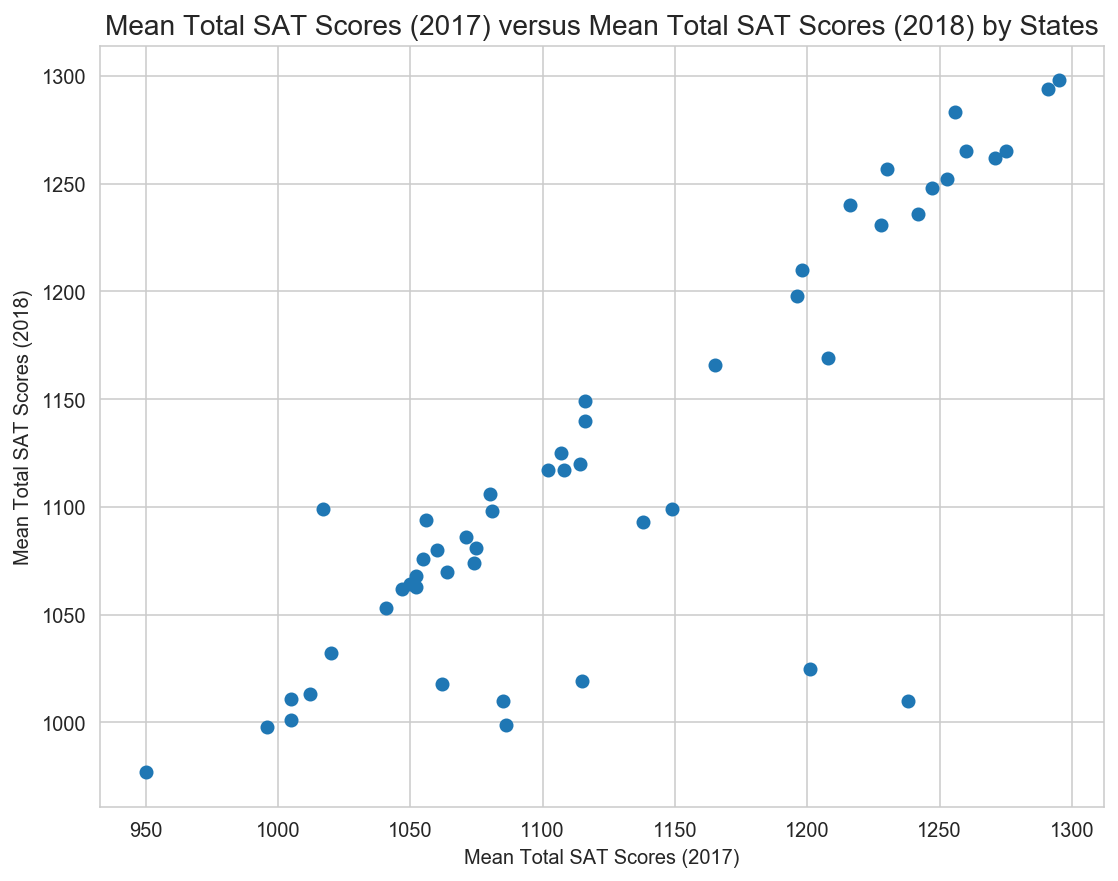

In [71]:
# Total scores for SAT 2017 vs. 2018
# Establish the size of the figure.
plt.figure(figsize=(9, 7))

# Create scatter plot of Total scores for SAT 2017 vs. 2018.
plt.scatter(merged_scores.total_sat_17,
            merged_scores.total_sat_18);

plt.title("Mean Total SAT Scores (2017) versus Mean Total SAT Scores (2018) by States", fontsize = 14)
plt.ylabel("Mean Total SAT Scores (2018)", fontsize = 10)
plt.xlabel("Mean Total SAT Scores (2017)", fontsize = 10);

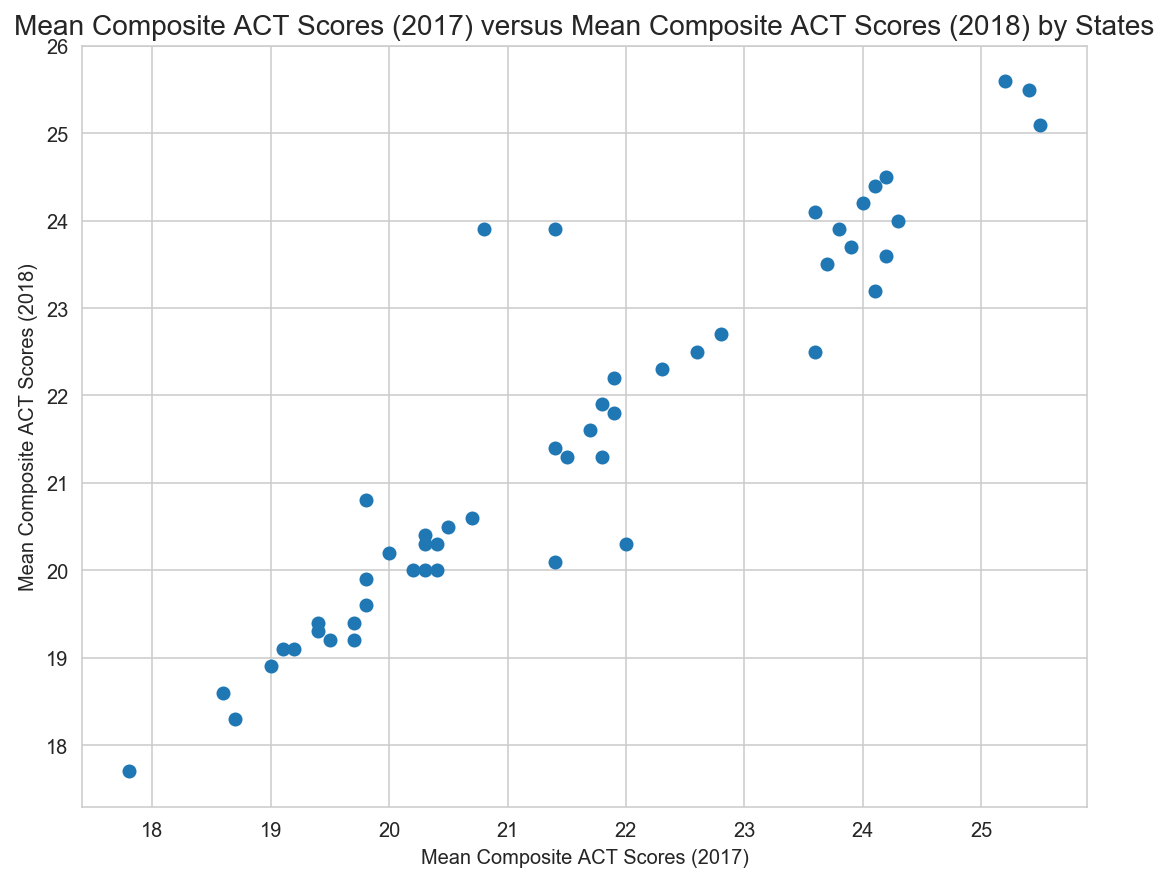

In [72]:
# Composite scores for ACT 2017 vs. 2018
# Establish the size of the figure.
plt.figure(figsize=(9, 7))

# Create scatter plot of Composite scores for ACT 2017 vs. 2018.
plt.scatter(merged_scores.composite_act_17,
            merged_scores.composite_act_18);

plt.title("Mean Composite ACT Scores (2017) versus Mean Composite ACT Scores (2018) by States", fontsize = 14)
plt.ylabel("Mean Composite ACT Scores (2018)", fontsize = 10)
plt.xlabel("Mean Composite ACT Scores (2017)", fontsize = 10);

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

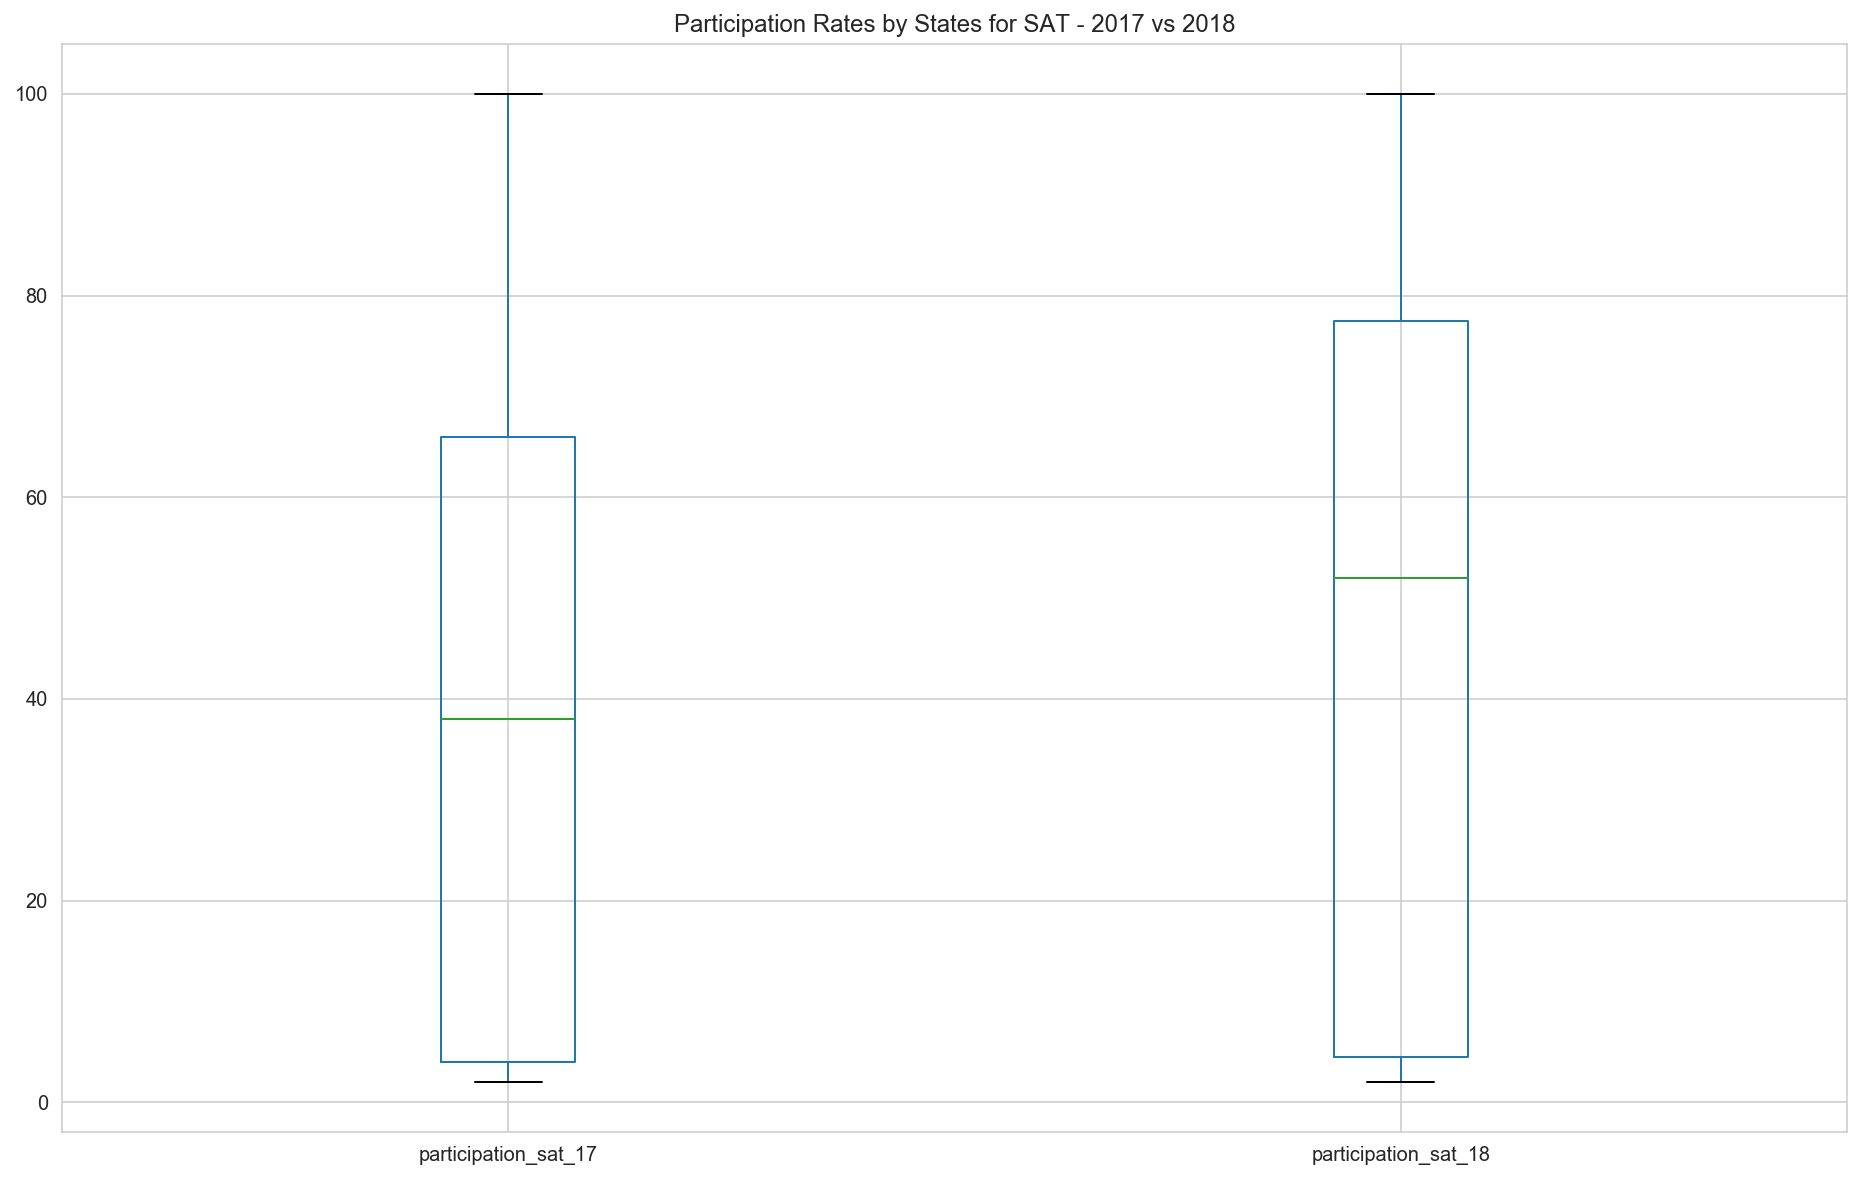

In [94]:
# Boxplots for Participation Rates - SAT 2017 & SAT 2018
merged_scores.filter(['participation_sat_17', 'participation_sat_18']).plot(kind='box', figsize=(16,10));
plt.title('Participation Rates by States for SAT - 2017 vs 2018');

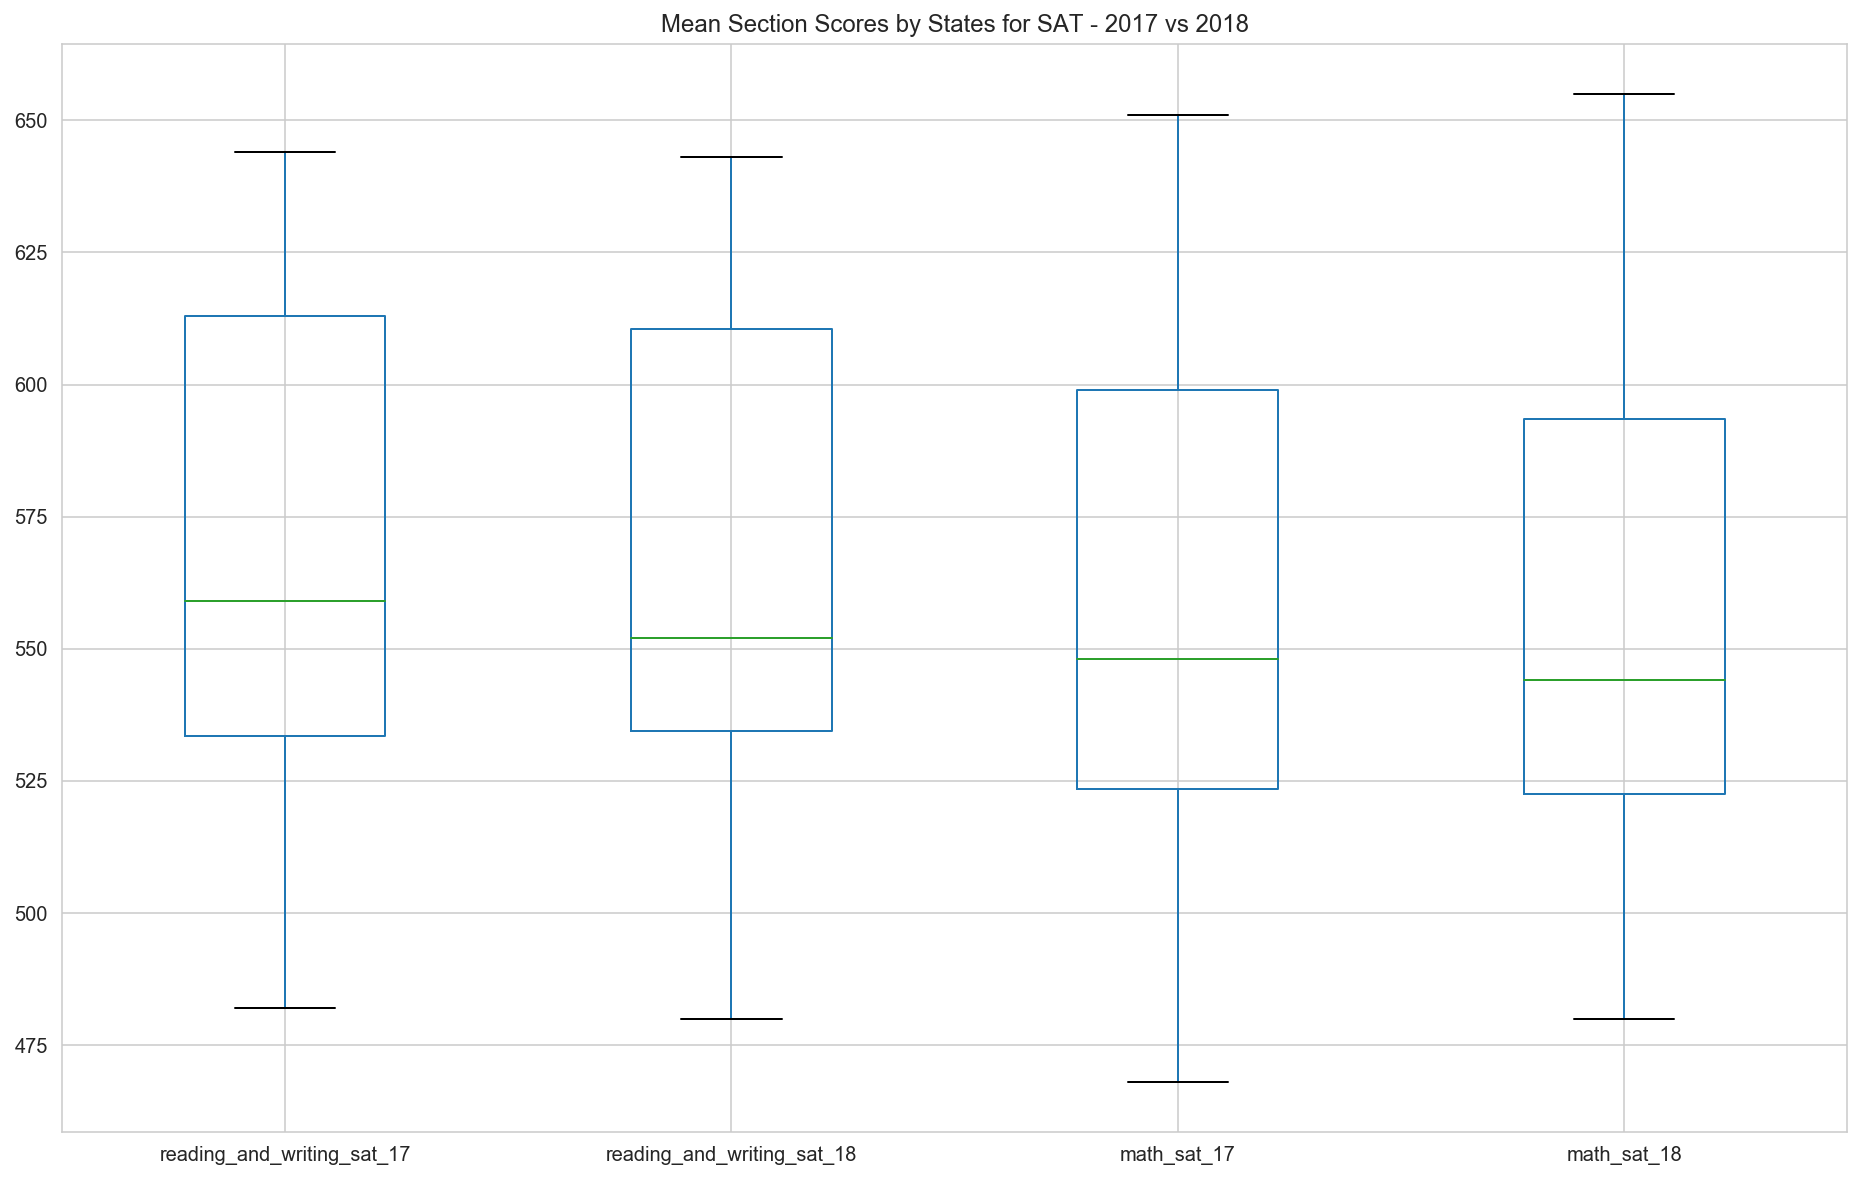

In [92]:
# Boxplots for Mean Section Scores by States - SAT 2017 & SAT 2018
merged_scores.filter(['reading_and_writing_sat_17', 'reading_and_writing_sat_18','math_sat_17','math_sat_18']).plot(kind='box', figsize=(16,10));
plt.title('Mean Section Scores by States for SAT - 2017 vs 2018');

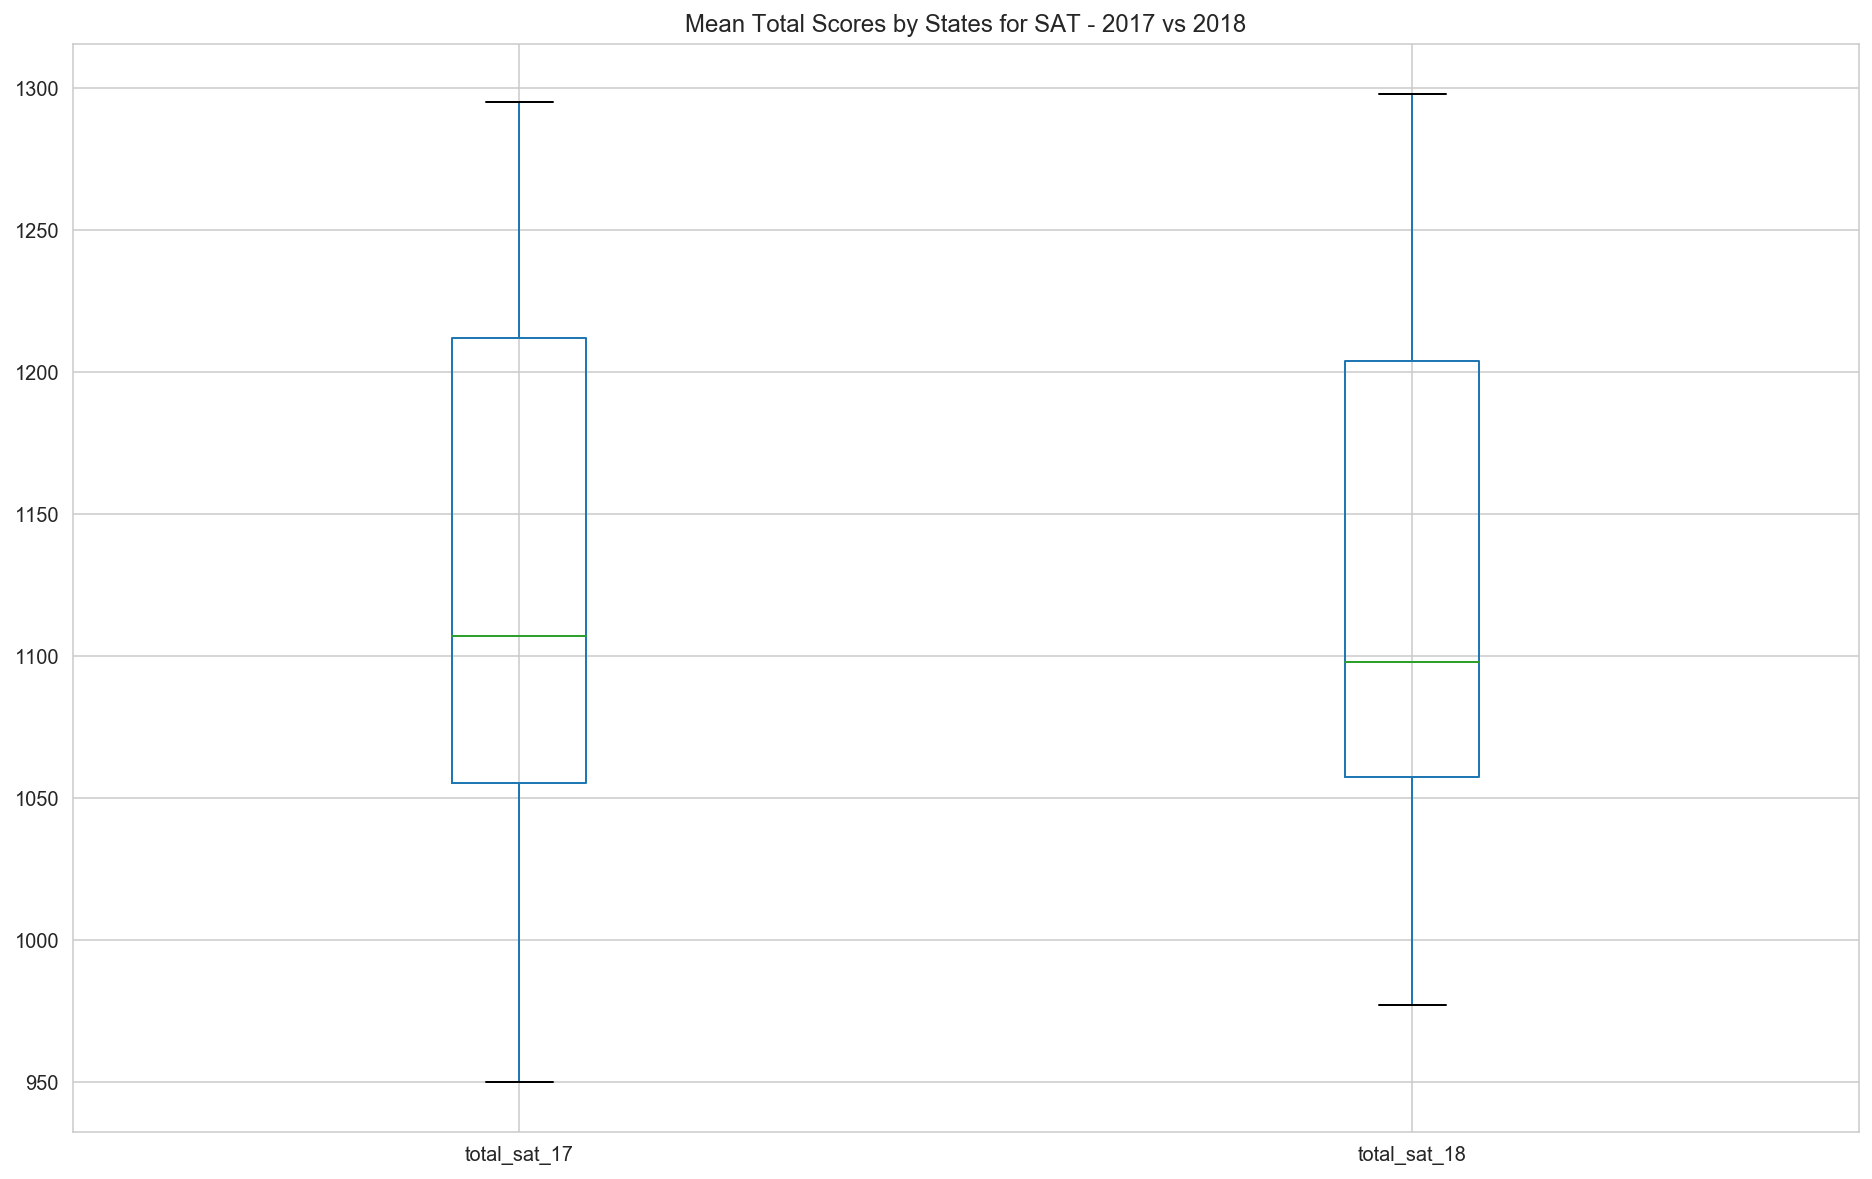

In [91]:
# Boxplots for Mean Total Scores by States - SAT 2017 & SAT 2018
merged_scores.filter(['total_sat_17', 'total_sat_18']).plot(kind='box', figsize=(16,10));
plt.title('Mean Total Scores by States for SAT - 2017 vs 2018');

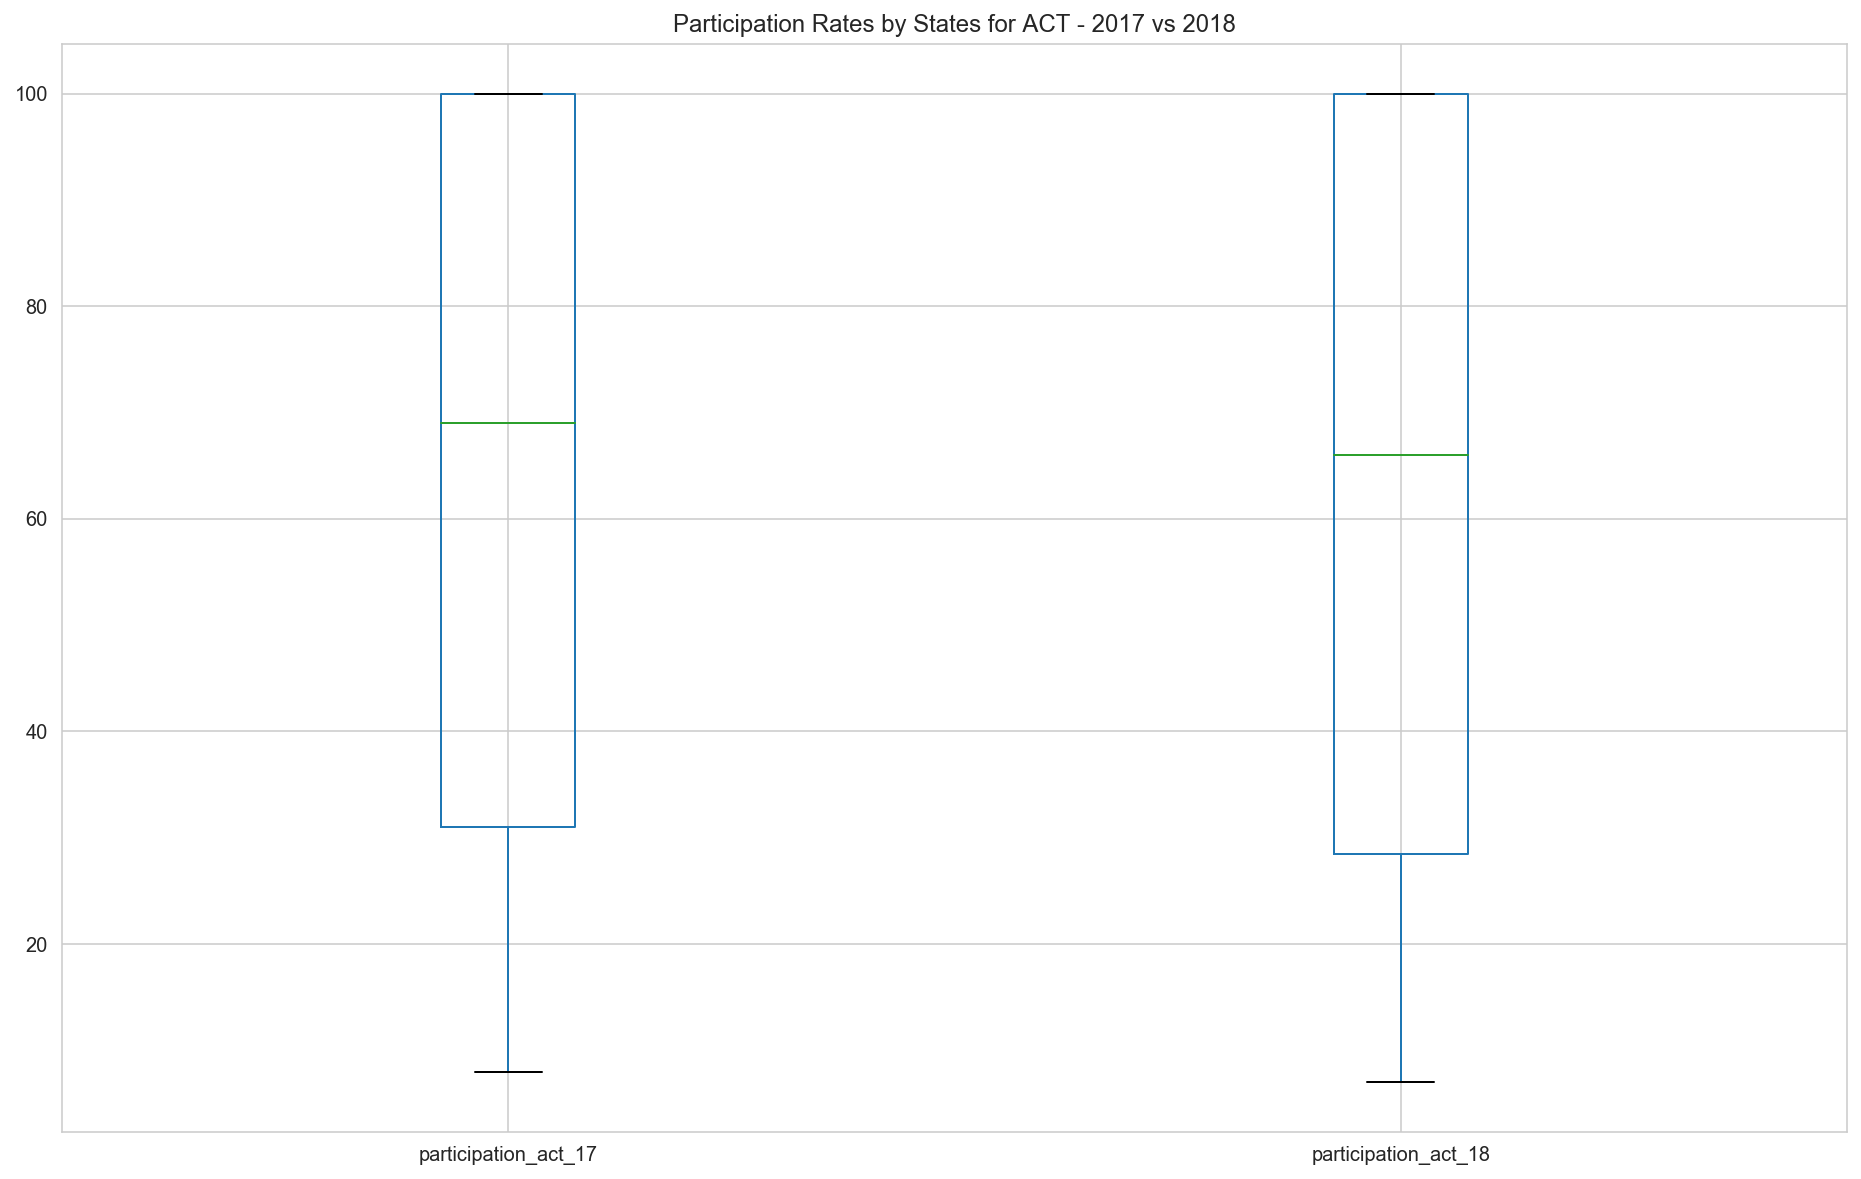

In [90]:
# Boxplots for Participation Rates - ACT 2017 & ACT 2018
merged_scores.filter(['participation_act_17', 'participation_act_18']).plot(kind='box', figsize=(16,10));
plt.title('Participation Rates by States for ACT - 2017 vs 2018');

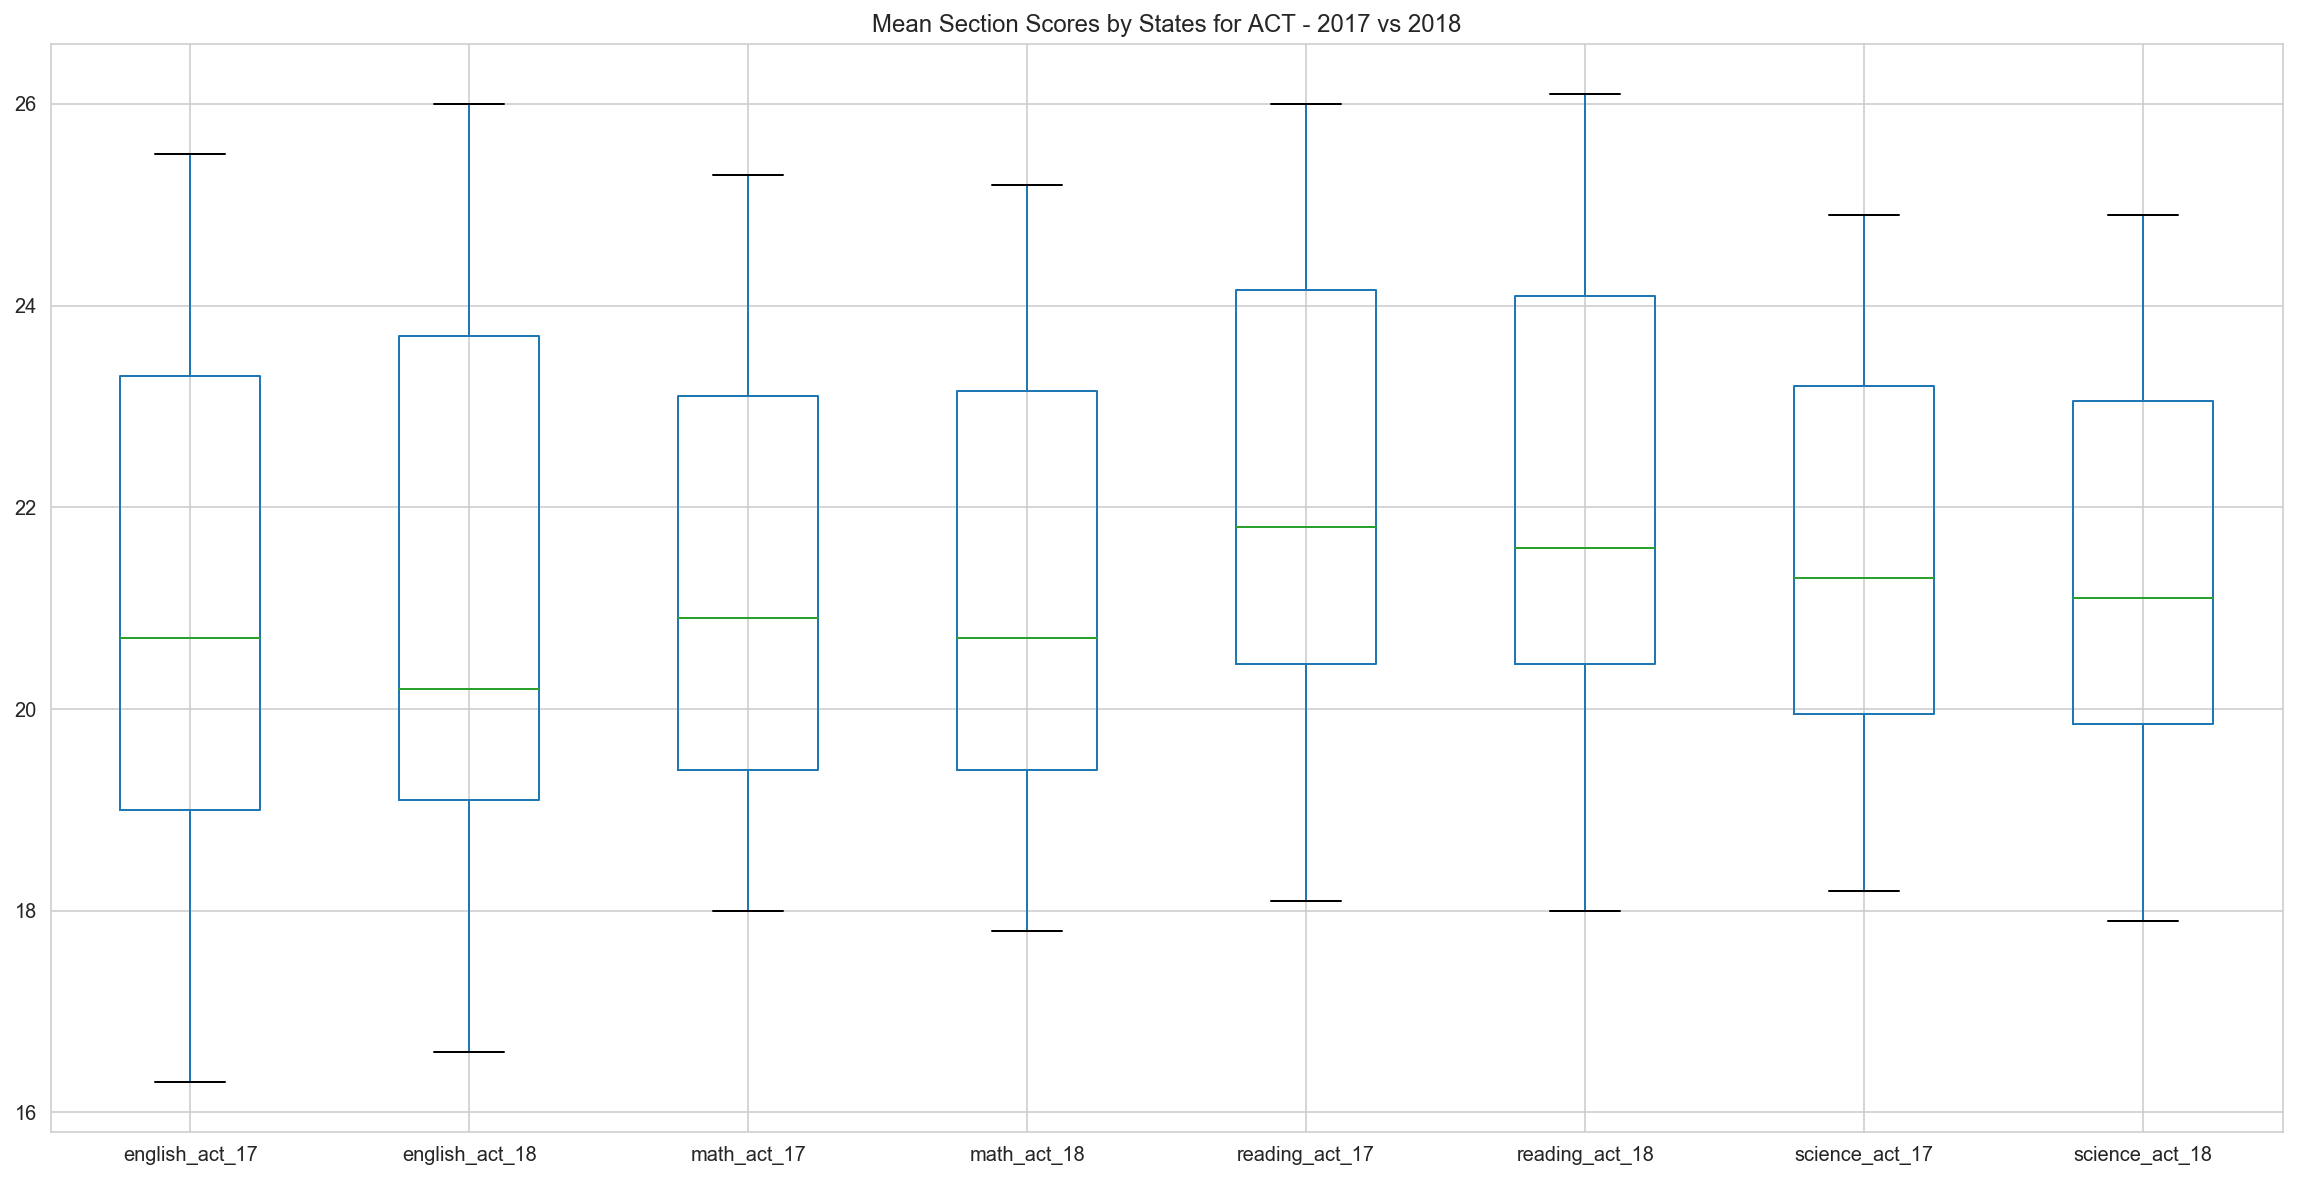

In [86]:
# Boxplots for Mean Section Scores by States - ACT 2017 & ACT 2018
merged_scores.filter(['english_act_17', 'english_act_18','math_act_17','math_act_18','reading_act_17','reading_act_18','science_act_17','science_act_18']).plot(kind='box', figsize=(20,10));
plt.title('Mean Section Scores by States for ACT - 2017 vs 2018');

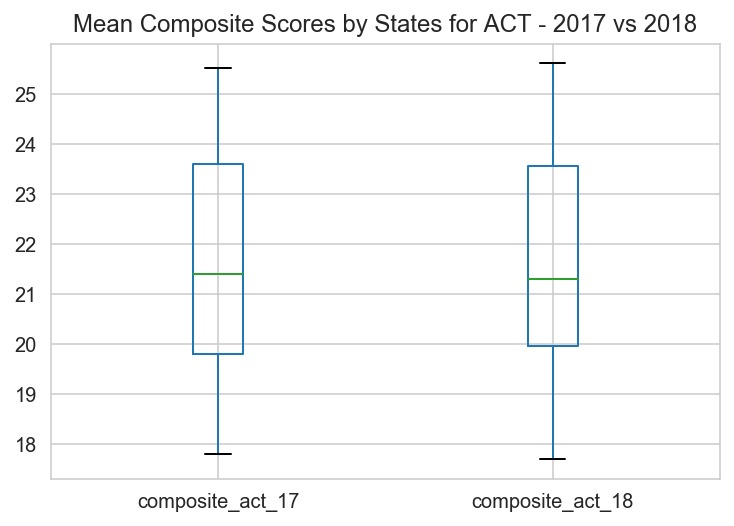

In [81]:
# Boxplots for Mean Composite Scores by States - ACT 2017 & ACT 2018
merged_scores.filter(['composite_act_17', 'composite_act_18']).plot(kind='box');
plt.title('Mean Composite Scores by States for ACT - 2017 vs 2018');

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?